**COMEÇO DO PROJETO**


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from math import sqrt

**INTRODUÇÃO**

O objetivo do nosso projeto é comparar o perfil dos participantes do ENEM de 2019 a 2023 e construir uma análise exploratória de dados que permita entender (prever) a Média Ponderada via ENEM (MPE) para candidatos interessados em ADM/ECO.

Assim, para compreender a importância dessa análise é muito importante recorrer ao nosso contexto: O ENEM é muito
importante como ferramenta de acesso ao ensino superior, ainda mais quando se pensa em regiões afastadas das
capitais, onde realizar um vestibular para uma faculdade renomada é um processo muito difícil, não assistido por
essas instituições. Além do mais, realizar um vestibular que permite o ingresso para dezenas de federais diminui em
muito a burocracia num cenário onde é necessário fazer vários vestibulares, além dos possíveis custos envolvidos,
como transporte ou taxas de inscrições. Desse modo, percebe-se que esses, e muitos outros motivos, demonstram como
o ENEM a ajuda todos os estudantes.

Ademais, é relevante abordar brevemente a estrutura da base de microdados do ENEM, a qual será utilizada como base
para nossa ADE (Análise Exploratória de Dados). Assim, contida nela nós temos informações importantes que podem ser divididas em grupos para facilitar a sua compreensão, podendo ser, pelo mesmo motivo enumeradas:
        
- **1: Informações pessoais do vestibulando**: neste grupo, constam todo tipo de informações sobre o estudante, desde número de inscrição e tipo de ensino médio, até faixa etária e cor ou raça.
- **2: Informações sobre tipo e local de realização da prova**: aqui, estão contidos todos os dados relativos à realização da prova, principalmente de
localização.
- **3: Informações de desempenho do vestibulando**: dados relativos ao desempenho do vestibulando em diferentes áreas, incluindo diferentes abordagens para além do número de acertos, como, por exemplo, taxas de acertos.
- **4: Informações adicionais:** informações adicionais identificadas por um código, onde se obtém informações como, por exemplo, escolaridade dos pais.

Nesse momento, faz-se relevante introduzir a pergunta central do nosso estudo:
        
“O perfil do candidato e seu desempenho nas provas do ENEM mudaram entre 2019 e 2023? Essas mudanças impactam a previsão da média ponderada para uma determinada escolha de curso?”

**MINERANDO DADOS E CARACTERÍSTICAS DO DATASET**

Como já abordado, as bases utilizadas serão os Microdados do ENEM de 2019 a 2023, obtidos no site do INEP.

Para facilitar a compreensão da análise, cabe destacar a estrutura dos arquivos utilizados. Os arquivos utilizados 
estão no formato .csv, possuindo tamanho de 3933955 linhas por 76 colunas e seguem uma disposição de informações onde
há títulos no topo das colunas e as respectivas informações nas linhas abaixo. A organização, realizada acima, das colunas por tipo de informações, ajuda na compreensão dos dados fornecidos pelo INEP.

Por fim, é de grande importância deixar claro a seleção das features do grupo, assim como os filtros de linhas e
colunas adotados:
        
O objetivo principal desse trabalho é comparar os resultados e verificar qual foi o perfil de estudante mais prejudicado pela pandemia. Assim, para isso será necessário correlacionar a escolaridade dos pais com a nota dos filhos na prova, utilizando-se das colunas Q001, Q002, Q003, Q004, Q022, Q025 e todas as colunas de nota, além da região em que o aluno estudou e seus resultados na prova, valendo-se da coluna TP_LOCALIZACAO_ESC, e o desempenho de alunos de escola pública e particular.
Sendo assim, para o filtro de colunas de 2019 e 2023 foram selecionados as seguintes colunas:
        
'TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_DEPENDENCIA_ADM_ESC','TP_ESCOLA','TP_LOCALIZACAO_ESC','Q001','Q002', 'Q003', 'Q004', 'Q006', 'Q022', 'Q025',
        
assim como para o de linhas foram selecionadas tais linhas:
        
'TP_ST_CONCLUSAO', 'TP_STATUS_REDACAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'IN_TREINEIRO'.

In [3]:
#Importando e filtrando os dados contidos na planilha dos microdados ENEM
# df23 = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';', encoding='ISO-8859-1')

# df19 = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1')


In [4]:
# df23['MPE'] = 0.75 * (0.25 * df23['NU_NOTA_LC'] + 0.4 * df23['NU_NOTA_MT'] + 0.25 * df23['NU_NOTA_CH'] + 0.1 * df23['NU_NOTA_CN']) + 0.25*df23['NU_NOTA_REDACAO']

# df19['MPE'] = 0.75 * (0.25 * df19['NU_NOTA_LC'] + 0.4 * df19['NU_NOTA_MT'] + 0.25 * df19['NU_NOTA_CH'] + 0.1 * df19['NU_NOTA_CN']) + 0.25*df19['NU_NOTA_REDACAO']

In [5]:


# filtro = (
#     (df23['IN_TREINEIRO'] == 0) &
#     (df23['TP_PRESENCA_LC'] == 1) &
#     (df23['TP_PRESENCA_MT'] == 1) &
#     (df23['TP_PRESENCA_CH'] == 1) &
#     (df23['TP_PRESENCA_CN'] == 1) &
#     (df23['TP_STATUS_REDACAO'] == 1) &
#     (df23['TP_ST_CONCLUSAO'] == 2)
    
# )

# colunas23 = ['MPE','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_DEPENDENCIA_ADM_ESC','TP_ESCOLA','TP_LOCALIZACAO_ESC','Q001','Q002', 'Q003', 'Q004', 'Q006', 'Q022', 'Q025']
# df23 = df23.loc[filtro, colunas23].copy()



In [6]:


# filtro = (
#     (df19['IN_TREINEIRO'] == 0) &
#     (df19['TP_PRESENCA_LC'] == 1) &
#     (df19['TP_PRESENCA_MT'] == 1) &
#     (df19['TP_PRESENCA_CH'] == 1) &
#     (df19['TP_PRESENCA_CN'] == 1) &
#     (df19['TP_STATUS_REDACAO'] == 1) &
#     (df19['TP_ST_CONCLUSAO'] == 2)
    
# )

# colunas19 = ['MPE','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_DEPENDENCIA_ADM_ESC','TP_ESCOLA','TP_LOCALIZACAO_ESC','Q001','Q002', 'Q003', 'Q004', 'Q006', 'Q022', 'Q025']
# df19 = df19.loc[filtro, colunas19].copy()


In [7]:
# df23.head(5)

# Criando novo arquivo filtrado 

In [8]:
# #Arquivo de 2019 
# df19.to_csv('enem_19.csv') 

# #Arquivo de 2023 
# df23.to_csv('enem_23.csv')

In [9]:
df19 = pd.read_csv('enem_19.csv')
df23 = pd.read_csv('enem_23.csv')

In [10]:
df19.head(5)

,Unnamed: 0,MPE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_DEPENDENCIA_ADM_ESC,TP_ESCOLA,TP_LOCALIZACAO_ESC,Q001,Q002,Q003,Q004,Q006,Q022,Q025
0,9,481.99000,M,1,2,NaN,2,NaN,E,E,B,B,F,C,B
1,26,744.41250,F,1,2,4.0,3,1.0,E,E,B,B,E,C,B
2,28,479.76625,F,1,2,2.0,2,1.0,E,B,B,B,A,D,A
3,31,516.73500,F,2,2,2.0,2,1.0,E,F,B,D,B,D,B
4,34,630.12875,M,2,2,2.0,2,1.0,E,C,B,B,B,C,B


# Renomeando as features

Nessa sessão vamos renomear para uma qualitativa



In [11]:
#Primeiramente, transformando em category váriaveis qualitativas

#Para 2019 
df19['TP_SEXO'] = df19.TP_SEXO.astype('category')
df19['TP_COR_RACA'] = df19.TP_COR_RACA.astype('category')
df19['TP_ST_CONCLUSAO'] = df19.TP_ST_CONCLUSAO.astype('category')
df19['TP_ESCOLA'] = df19.TP_ESCOLA.astype('category')
df19['TP_DEPENDENCIA_ADM_ESC'] = df19.TP_DEPENDENCIA_ADM_ESC.astype('category')
df19['TP_LOCALIZACAO_ESC'] = df19.TP_LOCALIZACAO_ESC.astype('category')


#Para 2023 
df23['TP_SEXO'] = df23.TP_SEXO.astype('category')
df23['TP_COR_RACA'] = df23.TP_COR_RACA.astype('category')
df23['TP_ST_CONCLUSAO'] = df23.TP_ST_CONCLUSAO.astype('category')
df23['TP_ESCOLA'] = df23.TP_ESCOLA.astype('category')
df23['TP_DEPENDENCIA_ADM_ESC'] = df23.TP_DEPENDENCIA_ADM_ESC.astype('category')
df23['TP_LOCALIZACAO_ESC'] = df23.TP_LOCALIZACAO_ESC.astype('category')


#Agora renomeando 2019

df19["TP_DEPENDENCIA_ADM_ESC"] = df19["TP_DEPENDENCIA_ADM_ESC"].cat.rename_categories({
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
})


# Q001 – Escolaridade do pai
df19["Q001"] = df19["Q001"].astype("category")
df19["Q001"] = df19["Q001"].cat.rename_categories({
    "A": "Nunca estudou.",
    "B": "Não completou a 4ª série/5º ano do Ensino Fundamental.",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade.",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação.",
    "G": "Completou a Pós-graduação.",
    "H": "Não sei."
})

# Q002 – Escolaridade da mãe
df19["Q002"] = df19["Q002"].astype("category")
df19["Q002"] = df19["Q002"].cat.rename_categories({
    "A": "Nunca estudou.",
    "B": "Não completou a 4ª série/5º ano do Ensino Fundamental.",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade.",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação.",
    "G": "Completou a Pós-graduação.",
    "H": "Não sei."
})

# Q003 – Ocupação do pai
df19["Q003"] = df19["Q003"].astype("category")
df19["Q003"] = df19["Q003"].cat.rename_categories({
    "A": "Grupo 1: Lavrador, agricultor sem empregados, bóia-fria, criador de animais, pescador, lenhador, extrativista.",
    "B": "Grupo 2: Diarista, empregada doméstica, jardineiro, motorista particular, porteiro, atendente, vendedor, auxiliar de escritório.",
    "C": "Grupo 3: Padeiro, cozinheiro, mecânico, soldador, operador de máquina, eletricista, cabeleireiro, policial, técnico, pequeno comerciante.",
    "D": "Grupo 4: Professor, técnico de enfermagem, contador, militar de baixa patente, policial militar, mestre de obras, proprietário de pequeno negócio.",
    "E": "Grupo 5: Médico, engenheiro, dentista, advogado, professor universitário, empresário, diretor, proprietário de empresa de médio ou grande porte."
})

# Q004 – Ocupação da mãe
df19["Q004"] = df19["Q004"].astype("category")
df19["Q004"] = df19["Q004"].cat.rename_categories({
    "A": "Grupo 1: Lavradora, agricultora sem empregados, bóia-fria, criadora de animais, pescadora, lenhadora, extrativista.",
    "B": "Grupo 2: Diarista, empregada doméstica, babá, cozinheira, costureira, manicure, atendente, balconista, auxiliar de escritório.",
    "C": "Grupo 3: Padeira, cozinheira industrial, cabeleireira, operadora de máquina, técnica, enfermeira, professora de ensino fundamental, pequena comerciante.",
    "D": "Grupo 4: Professora de ensino médio, técnica de laboratório, policial, militar, proprietária de pequeno negócio.",
    "E": "Grupo 5: Médica, engenheira, dentista, advogada, professora universitária, empresária, diretora, proprietária de empresa de médio ou grande porte."
})

# Q006 – Renda familiar mensal
df19["Q006"] = df19["Q006"].astype("category")
df19["Q006"] = df19["Q006"].cat.rename_categories({
    "A": "Nenhuma renda.",
    "B": "Até R$ 1.320,00.",
    "C": "De R$ 1.320,01 até R$ 1.980,00.",
    "D": "De R$ 1.980,01 até R$ 2.640,00.",
    "E": "De R$ 2.640,01 até R$ 3.300,00.",
    "F": "De R$ 3.300,01 até R$ 3.960,00.",
    "G": "De R$ 3.960,01 até R$ 5.280,00.",
    "H": "De R$ 5.280,01 até R$ 6.600,00.",
    "I": "De R$ 6.600,01 até R$ 7.920,00.",
    "J": "De R$ 7.920,01 até R$ 9.240,00.",
    "K": "De R$ 9.240,01 até R$ 10.560,00.",
    "L": "De R$ 10.560,01 até R$ 11.880,00.",
    "M": "De R$ 11.880,01 até R$ 13.200,00.",
    "N": "De R$ 13.200,01 até R$ 15.840,00.",
    "O": "De R$ 15.840,01 até R$ 19.800,00.",
    "P": "De R$ 19.800,01 até R$ 26.400,00.",
    "Q": "Acima de R$ 26.400,00."
})

# Q022 – Acesso à internet
df19["Q025"] = df19["Q025"].astype("category")
df19["Q025"] = df19["Q025"].cat.rename_categories({
    "A": "Não.",
    "B": "Sim"
})

# Q025 – Acesso à água encanada
df19["Q022"] = df19["Q022"].astype("category")
df19["Q022"] = df19["Q022"].cat.rename_categories({
    "A": "Não.",
    "B": "Sim, um.",
    "C": "Sim, dois.",
    "D": "Sim, três.",
    "E": "Sim, quatro ou mais."
})


df19.TP_SEXO = df19.TP_SEXO.cat.rename_categories({'M': 'Masculino', 'F': 'Feminino'})


df19.TP_COR_RACA = df19.TP_COR_RACA.cat.rename_categories({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})

df19["TP_ST_CONCLUSAO"] = df19["TP_ST_CONCLUSAO"].cat.rename_categories({
    1: "Já concluiu o Ensino Médio",
    2: "Estou cursando e concluirei o Ensino Médio em 2019",
    3: "Estou cursando e concluirei o Ensino Médio após 2019",
    4: "Não concluiu e não está cursando o Ensino Médio"
})

df19["TP_ST_CONCLUSAO"] = df19["TP_ST_CONCLUSAO"].cat.rename_categories({
    1: "Já concluiu o Ensino Médio",
    2: "Estou cursando e concluirei o Ensino Médio em 2019",
    3: "Estou cursando e concluirei o Ensino Médio após 2019",
    4: "Não concluiu e não está cursando o Ensino Médio"
})

df19["TP_ESCOLA"] = df19["TP_ESCOLA"].cat.rename_categories({
    1: "Não respondeu",
    2: "Pública",
    3: "Privada",
    4: "Exterior"
})


df19['TP_LOCALIZACAO_ESC'] = df19['TP_LOCALIZACAO_ESC'].cat.rename_categories({ 1: 'Urbana', 2: 'Rural'}) 

#Agora renomeando 2023 

df23["TP_DEPENDENCIA_ADM_ESC"] = df23["TP_DEPENDENCIA_ADM_ESC"].cat.rename_categories({
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
})


# Q001 – Escolaridade do pai
df23["Q001"] = df23["Q001"].astype("category")
df23["Q001"] = df23["Q001"].cat.rename_categories({
    "A": "Nunca estudou.",
    "B": "Não completou a 4ª série/5º ano do Ensino Fundamental.",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade.",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação.",
    "G": "Completou a Pós-graduação.",
    "H": "Não sei."
})

# Q002 – Escolaridade da mãe
df23["Q002"] = df23["Q002"].astype("category")
df23["Q002"] = df23["Q002"].cat.rename_categories({
    "A": "Nunca estudou.",
    "B": "Não completou a 4ª série/5º ano do Ensino Fundamental.",
    "C": "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
    "D": "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
    "E": "Completou o Ensino Médio, mas não completou a Faculdade.",
    "F": "Completou a Faculdade, mas não completou a Pós-graduação.",
    "G": "Completou a Pós-graduação.",
    "H": "Não sei."
})

# Q003 – Ocupação do pai
df23["Q003"] = df23["Q003"].astype("category")
df23["Q003"] = df23["Q003"].cat.rename_categories({
    "A": "Grupo 1: Lavrador, agricultor sem empregados, bóia-fria, criador de animais, pescador, lenhador, extrativista.",
    "B": "Grupo 2: Diarista, empregada doméstica, jardineiro, motorista particular, porteiro, atendente, vendedor, auxiliar de escritório.",
    "C": "Grupo 3: Padeiro, cozinheiro, mecânico, soldador, operador de máquina, eletricista, cabeleireiro, policial, técnico, pequeno comerciante.",
    "D": "Grupo 4: Professor, técnico de enfermagem, contador, militar de baixa patente, policial militar, mestre de obras, proprietário de pequeno negócio.",
    "E": "Grupo 5: Médico, engenheiro, dentista, advogado, professor universitário, empresário, diretor, proprietário de empresa de médio ou grande porte."
})

# Q004 – Ocupação da mãe
df23["Q004"] = df23["Q004"].astype("category")
df23["Q004"] = df23["Q004"].cat.rename_categories({
    "A": "Grupo 1: Lavradora, agricultora sem empregados, bóia-fria, criadora de animais, pescadora, lenhadora, extrativista.",
    "B": "Grupo 2: Diarista, empregada doméstica, babá, cozinheira, costureira, manicure, atendente, balconista, auxiliar de escritório.",
    "C": "Grupo 3: Padeira, cozinheira industrial, cabeleireira, operadora de máquina, técnica, enfermeira, professora de ensino fundamental, pequena comerciante.",
    "D": "Grupo 4: Professora de ensino médio, técnica de laboratório, policial, militar, proprietária de pequeno negócio.",
    "E": "Grupo 5: Médica, engenheira, dentista, advogada, professora universitária, empresária, diretora, proprietária de empresa de médio ou grande porte."
})

# Q006 – Renda familiar mensal
df23["Q006"] = df23["Q006"].astype("category")
df23["Q006"] = df23["Q006"].cat.rename_categories({
    "A": "Nenhuma renda.",
    "B": "Até R$ 1.320,00.",
    "C": "De R$ 1.320,01 até R$ 1.980,00.",
    "D": "De R$ 1.980,01 até R$ 2.640,00.",
    "E": "De R$ 2.640,01 até R$ 3.300,00.",
    "F": "De R$ 3.300,01 até R$ 3.960,00.",
    "G": "De R$ 3.960,01 até R$ 5.280,00.",
    "H": "De R$ 5.280,01 até R$ 6.600,00.",
    "I": "De R$ 6.600,01 até R$ 7.920,00.",
    "J": "De R$ 7.920,01 até R$ 9.240,00.",
    "K": "De R$ 9.240,01 até R$ 10.560,00.",
    "L": "De R$ 10.560,01 até R$ 11.880,00.",
    "M": "De R$ 11.880,01 até R$ 13.200,00.",
    "N": "De R$ 13.200,01 até R$ 15.840,00.",
    "O": "De R$ 15.840,01 até R$ 19.800,00.",
    "P": "De R$ 19.800,01 até R$ 26.400,00.",
    "Q": "Acima de R$ 26.400,00."
})

# Q022 – Acesso à internet
df23["Q025"] = df23["Q025"].astype("category")
df23["Q025"] = df23["Q025"].cat.rename_categories({
    "A": "Não.",
    "B": "Sim"
})

# Q025 – telefone celular
df23["Q022"] = df23["Q022"].astype("category")
df23["Q022"] = df23["Q022"].cat.rename_categories({
    "A": "Não.",
    "B": "Sim, um.",
    "C": "Sim, dois.",
    "D": "Sim, três.",
    "E": "Sim, quatro ou mais."
})


df23.TP_SEXO = df23.TP_SEXO.cat.rename_categories({'M': 'Masculino', 'F': 'Feminino'})

df23.TP_COR_RACA = df23.TP_COR_RACA.cat.rename_categories({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})

df23["TP_ST_CONCLUSAO"] = df23["TP_ST_CONCLUSAO"].cat.rename_categories({
    1: "Já concluiu o Ensino Médio",
    2: "Estou cursando e concluirei o Ensino Médio em 2019",
    3: "Estou cursando e concluirei o Ensino Médio após 2019",
    4: "Não concluiu e não está cursando o Ensino Médio"
})

df23["TP_ST_CONCLUSAO"] = df23["TP_ST_CONCLUSAO"].cat.rename_categories({
    1: "Já concluiu o Ensino Médio",
    2: "Estou cursando e concluirei o Ensino Médio em 2019",
    3: "Estou cursando e concluirei o Ensino Médio após 2019",
    4: "Não concluiu e não está cursando o Ensino Médio"
})

df23["TP_ESCOLA"] = df23["TP_ESCOLA"].cat.rename_categories({
    1: "Não respondeu",
    2: "Pública",
    3: "Privada",
    4: "Exterior"
})

df23['TP_LOCALIZACAO_ESC'] = df23['TP_LOCALIZACAO_ESC'].cat.rename_categories({ 1: 'Urbana', 2: 'Rural'}) 


In [12]:
df19.head(5)

,Unnamed: 0,MPE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_DEPENDENCIA_ADM_ESC,TP_ESCOLA,TP_LOCALIZACAO_ESC,Q001,Q002,Q003,Q004,Q006,Q022,Q025
0,9,481.99000,Masculino,Branca,Estou cursando e concluirei o Ensino Médio em ...,NaN,Pública,NaN,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Grupo 2: Diarista, empregada doméstica, jardin...","Grupo 2: Diarista, empregada doméstica, babá, ...","De R$ 3.300,01 até R$ 3.960,00.","Sim, dois.",Sim
1,26,744.41250,Feminino,Branca,Estou cursando e concluirei o Ensino Médio em ...,Privada,Privada,Urbana,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Grupo 2: Diarista, empregada doméstica, jardin...","Grupo 2: Diarista, empregada doméstica, babá, ...","De R$ 2.640,01 até R$ 3.300,00.","Sim, dois.",Sim
2,28,479.76625,Feminino,Branca,Estou cursando e concluirei o Ensino Médio em ...,Estadual,Pública,Urbana,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...,"Grupo 2: Diarista, empregada doméstica, jardin...","Grupo 2: Diarista, empregada doméstica, babá, ...",Nenhuma renda.,"Sim, três.",Não.
3,31,516.73500,Feminino,Preta,Estou cursando e concluirei o Ensino Médio em ...,Estadual,Pública,Urbana,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós...","Grupo 2: Diarista, empregada doméstica, jardin...","Grupo 4: Professora de ensino médio, técnica d...","Até R$ 1.320,00.","Sim, três.",Sim
4,34,630.12875,Masculino,Preta,Estou cursando e concluirei o Ensino Médio em ...,Estadual,Pública,Urbana,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou...","Grupo 2: Diarista, empregada doméstica, jardin...","Grupo 2: Diarista, empregada doméstica, babá, ...","Até R$ 1.320,00.","Sim, dois.",Sim


**REFERÊNCIAS::**
        
Microdados. Disponível em: <https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados>.
        
Enem. Disponível em: <https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem>.
        
SILVA, V. A. A. DA et al. Identificação de Desigualdades Sociais a partir do desempenho dos alunos do Ensino Médio no ENEM 2019 utilizando Mineração de Dados. Anais do XXXI Simpósio Brasileiro de Informática na Educação (SBIE 2020), 24 nov. 2020.
        
WEBER NETO, N. et al. A Pandemia da COVID-19 impactou o ENEM? Uma Análise Comparativa de Dados dos Anos de 2019 e 2020. RENOTE, v. 20, n. 1, p. 223–232, 31 ago. 2022.

Describre de todas as features de 2019

In [13]:
lista_grupos = ['TP_SEXO','TP_COR_RACA','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','Q001','Q002','Q003','Q004','Q006','Q022','Q025']
for grupo in lista_grupos:
    display(df19.groupby(grupo).MPE.describe().round(2))

C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
Feminino,687259.0,532.41,85.11,75.0,470.3,520.72,586.56,862.68
Masculino,489513.0,545.14,91.14,115.0,477.0,536.71,606.78,882.73


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
Não declarado,24489.0,531.40,93.12,204.85,462.04,516.43,591.59,851.49
Branca,473638.0,564.28,90.42,213.14,496.61,557.16,628.60,882.73
Preta,130486.0,514.33,76.21,85.00,459.93,506.35,560.71,842.48
Parda,514373.0,520.11,81.59,75.00,460.83,509.93,570.68,866.69
Amarela,26902.0,536.46,88.49,220.52,471.58,524.00,592.49,851.36
Indígena,6884.0,494.35,71.08,254.28,444.78,486.32,536.84,781.11


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_DEPENDENCIA_ADM_ESC,,,,,,,,
Federal,46377.0,608.53,78.41,220.52,553.93,611.75,665.51,848.40
Estadual,712134.0,513.57,72.72,75.00,461.47,507.81,560.32,826.13
Municipal,7642.0,537.20,79.38,239.86,478.53,534.44,592.38,800.01
Privada,155144.0,627.75,84.70,215.12,569.14,633.36,691.76,882.73


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_LOCALIZACAO_ESC,,,,,,,,
Urbana,889951.0,538.71,88.03,75.00,473.96,527.98,596.16,882.73
Rural,31346.0,511.04,79.45,213.14,452.42,501.55,562.76,804.54


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q001,,,,,,,,
Nunca estudou.,40478.0,483.57,68.31,145.00,435.78,476.42,522.50,790.94
Não completou a 4ª série/5º ano do Ensino Fundamental.,187281.0,501.64,72.05,75.00,450.26,493.95,545.20,847.74
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",165257.0,518.10,76.51,115.00,463.02,510.22,565.99,850.72
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",154371.0,527.60,78.95,155.00,470.67,519.49,577.71,852.84
"Completou o Ensino Médio, mas não completou a Faculdade.",350451.0,549.77,83.36,120.00,488.81,542.83,606.55,854.49
"Completou a Faculdade, mas não completou a Pós-graduação.",106564.0,602.19,89.59,254.98,535.95,604.22,669.92,862.68
Completou a Pós-graduação.,66363.0,625.08,91.47,258.74,560.47,632.96,695.34,882.73
Não sei.,106007.0,508.00,76.40,187.88,453.32,499.23,553.86,866.69


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q002,,,,,,,,
Nunca estudou.,22700.0,476.73,65.02,145.00,431.44,470.66,514.31,775.55
Não completou a 4ª série/5º ano do Ensino Fundamental.,127750.0,494.82,69.57,85.00,445.55,487.92,536.23,831.86
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",143592.0,508.38,73.39,75.00,456.11,501.24,553.73,821.70
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",166286.0,518.01,75.59,155.00,464.19,510.36,564.60,852.84
"Completou o Ensino Médio, mas não completou a Faculdade.",423674.0,540.78,81.79,120.00,481.10,533.23,595.30,854.49
"Completou a Faculdade, mas não completou a Pós-graduação.",144119.0,588.93,91.04,221.99,520.62,587.91,657.56,870.53
Completou a Pós-graduação.,110491.0,603.82,93.21,214.74,534.14,606.95,675.76,882.73
Não sei.,38160.0,494.74,76.29,196.48,440.55,484.29,537.92,866.69


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q003,,,,,,,,
"Grupo 1: Lavrador, agricultor sem empregados, bóia-fria, criador de animais, pescador, lenhador, extrativista.",205664.0,496.37,73.15,145.00,444.10,487.68,539.77,847.74
"Grupo 2: Diarista, empregada doméstica, jardineiro, motorista particular, porteiro, atendente, vendedor, auxiliar de escritório.",237394.0,520.76,76.34,120.00,465.98,513.07,568.75,827.54
"Grupo 3: Padeiro, cozinheiro, mecânico, soldador, operador de máquina, eletricista, cabeleireiro, policial, técnico, pequeno comerciante.",287412.0,530.11,77.01,75.00,475.00,523.26,579.58,854.49
"Grupo 4: Professor, técnico de enfermagem, contador, militar de baixa patente, policial militar, mestre de obras, proprietário de pequeno negócio.",236043.0,581.96,87.51,115.00,516.89,580.18,646.48,870.53
"Grupo 5: Médico, engenheiro, dentista, advogado, professor universitário, empresário, diretor, proprietário de empresa de médio ou grande porte.",79090.0,629.40,91.26,214.74,565.91,639.08,699.27,882.73
F,131169.0,514.92,78.32,85.00,458.53,505.34,562.74,866.69


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q004,,,,,,,,
"Grupo 1: Lavradora, agricultora sem empregados, bóia-fria, criadora de animais, pescadora, lenhadora, extrativista.",162953.0,491.53,71.18,145.00,440.54,483.25,533.82,814.87
"Grupo 2: Diarista, empregada doméstica, babá, cozinheira, costureira, manicure, atendente, balconista, auxiliar de escritório.",490198.0,522.94,77.09,75.00,467.72,514.94,571.35,852.84
"Grupo 3: Padeira, cozinheira industrial, cabeleireira, operadora de máquina, técnica, enfermeira, professora de ensino fundamental, pequena comerciante.",86260.0,531.06,77.51,155.00,475.26,524.35,581.50,843.36
"Grupo 4: Professora de ensino médio, técnica de laboratório, policial, militar, proprietária de pequeno negócio.",276628.0,578.61,88.76,115.00,512.46,575.87,643.82,870.53
"Grupo 5: Médica, engenheira, dentista, advogada, professora universitária, empresária, diretora, proprietária de empresa de médio ou grande porte.",55122.0,632.70,92.27,284.64,568.94,643.69,703.34,882.73
F,105611.0,526.23,84.48,85.00,464.14,515.60,580.22,866.69


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q006,,,,,,,,
Nenhuma renda.,48289.0,484.01,67.24,145.00,436.96,476.46,521.86,811.06
"Até R$ 1.320,00.",280263.0,495.64,68.95,75.00,446.91,488.73,536.76,816.35
"De R$ 1.320,01 até R$ 1.980,00.",275609.0,515.73,73.56,85.00,463.36,509.09,561.89,830.78
"De R$ 1.980,01 até R$ 2.640,00.",102519.0,536.92,77.65,238.20,481.56,530.79,587.63,850.72
"De R$ 2.640,01 até R$ 3.300,00.",115706.0,541.58,78.23,221.12,485.31,535.86,593.42,852.84
"De R$ 3.300,01 até R$ 3.960,00.",54299.0,560.11,82.29,232.78,500.65,555.69,617.00,840.34
"De R$ 3.960,01 até R$ 5.280,00.",82381.0,565.56,81.80,225.08,506.07,561.98,622.91,847.74
"De R$ 5.280,01 até R$ 6.600,00.",50199.0,585.39,83.95,254.98,524.84,585.27,646.64,866.69
"De R$ 6.600,01 até R$ 7.920,00.",41833.0,591.47,84.49,265.95,530.16,592.25,653.60,849.98


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q022,,,,,,,,
Não.,28975.0,500.64,79.09,204.40,443.62,489.19,545.57,807.26
"Sim, um.",204917.0,498.26,73.29,155.00,446.51,489.47,540.62,845.63
"Sim, dois.",315668.0,525.94,80.62,75.00,467.77,516.83,576.80,847.31
"Sim, três.",364722.0,550.58,86.97,115.00,486.35,542.29,609.77,871.16
"Sim, quatro ou mais.",262490.0,568.87,93.23,187.88,498.30,562.16,637.13,882.73


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\1567871071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df19.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q025,,,,,,,,
Não.,238945.0,492.48,68.68,75.0,443.92,485.63,533.42,846.96
Sim,937827.0,549.23,88.53,85.0,483.58,540.00,609.51,882.73


Describre de todas as features de 2023

In [14]:
for grupo in lista_grupos:
    display(df23.groupby(grupo).MPE.describe().round(2))

C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
Feminino,601593.0,554.20,95.08,55.0,483.38,549.88,623.06,860.42
Masculino,406469.0,561.04,99.49,115.0,488.11,558.68,632.53,890.26


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
Não declarado,11008.0,545.73,102.27,197.19,467.92,539.38,619.84,847.46
Branca,461003.0,584.12,95.94,115.00,514.37,584.46,655.56,869.96
Preta,109266.0,527.69,87.77,161.01,464.03,522.92,587.96,856.55
Parda,406555.0,535.36,91.85,55.00,467.48,530.28,599.47,890.26
Amarela,15070.0,550.52,103.66,191.84,472.37,539.93,626.04,846.96
Indígena,5160.0,494.88,82.66,187.70,434.59,486.36,549.30,789.80


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_DEPENDENCIA_ADM_ESC,,,,,,,,
Federal,43398.0,614.38,83.71,188.08,558.98,620.63,675.32,855.13
Estadual,430574.0,530.70,86.30,55.00,468.26,528.54,591.46,868.42
Municipal,5582.0,541.13,88.84,212.14,475.96,539.27,602.53,802.78
Privada,213112.0,637.38,86.65,199.58,580.20,646.34,701.72,890.26


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
TP_LOCALIZACAO_ESC,,,,,,,,
Urbana,669952.0,570.26,99.54,55.00,496.64,569.37,644.39,890.26
Rural,22714.0,527.18,93.44,182.49,456.29,522.04,594.52,846.68


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q001,,,,,,,,
Nunca estudou.,25870.0,494.39,83.69,145.71,433.36,487.60,550.35,830.92
Não completou a 4ª série/5º ano do Ensino Fundamental.,123953.0,515.98,86.14,55.00,453.12,510.65,574.92,827.44
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",123090.0,533.71,87.53,115.00,469.89,530.01,594.81,837.93
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",122500.0,541.90,88.42,182.49,477.42,538.59,603.74,856.36
"Completou o Ensino Médio, mas não completou a Faculdade.",323423.0,564.76,90.32,161.01,499.47,563.94,630.32,863.06
"Completou a Faculdade, mas não completou a Pós-graduação.",103226.0,617.55,91.96,215.44,553.76,624.60,686.93,890.26
Completou a Pós-graduação.,80759.0,635.27,95.29,164.83,571.14,647.03,707.82,868.42
Não sei.,105241.0,521.86,87.14,160.01,458.60,516.72,581.05,838.95


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q002,,,,,,,,
Nunca estudou.,13058.0,484.64,81.84,170.84,425.49,477.03,537.88,830.92
Não completou a 4ª série/5º ano do Ensino Fundamental.,77402.0,506.14,84.59,55.00,444.41,500.38,563.58,838.20
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",94756.0,520.23,84.73,174.76,458.67,515.59,578.10,837.93
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",123412.0,529.47,86.12,145.71,467.08,525.80,588.93,847.10
"Completou o Ensino Médio, mas não completou a Faculdade.",386682.0,554.73,89.13,115.00,490.16,552.65,618.54,890.26
"Completou a Faculdade, mas não completou a Pós-graduação.",138756.0,603.15,94.50,175.00,536.17,607.76,674.66,869.96
Completou a Pós-graduação.,137116.0,615.94,96.76,192.59,547.54,623.77,690.32,867.43
Não sei.,36880.0,505.94,87.30,176.82,442.39,498.23,562.94,832.60


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q003,,,,,,,,
"Grupo 1: Lavrador, agricultor sem empregados, bóia-fria, criador de animais, pescador, lenhador, extrativista.",153042.0,512.38,88.51,55.00,446.54,505.52,573.16,833.50
"Grupo 2: Diarista, empregada doméstica, jardineiro, motorista particular, porteiro, atendente, vendedor, auxiliar de escritório.",188314.0,538.87,87.08,115.00,475.68,535.43,599.84,847.60
"Grupo 3: Padeiro, cozinheiro, mecânico, soldador, operador de máquina, eletricista, cabeleireiro, policial, técnico, pequeno comerciante.",242692.0,548.54,86.38,144.06,486.46,546.56,609.23,843.68
"Grupo 4: Professor, técnico de enfermagem, contador, militar de baixa patente, policial militar, mestre de obras, proprietário de pequeno negócio.",211969.0,600.85,91.67,164.83,536.30,605.23,669.71,890.26
"Grupo 5: Médico, engenheiro, dentista, advogado, professor universitário, empresário, diretor, proprietário de empresa de médio ou grande porte.",83391.0,639.71,95.55,199.58,577.02,653.43,712.08,869.96
F,128654.0,526.41,88.62,161.26,461.75,520.65,586.55,852.86


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q004,,,,,,,,
"Grupo 1: Lavradora, agricultora sem empregados, bóia-fria, criadora de animais, pescadora, lenhadora, extrativista.",118234.0,505.28,86.94,170.84,440.36,498.02,564.75,830.92
"Grupo 2: Diarista, empregada doméstica, babá, cozinheira, costureira, manicure, atendente, balconista, auxiliar de escritório.",395101.0,540.88,87.47,55.00,477.67,537.37,601.80,890.26
"Grupo 3: Padeira, cozinheira industrial, cabeleireira, operadora de máquina, técnica, enfermeira, professora de ensino fundamental, pequena comerciante.",67270.0,546.54,87.19,162.62,483.51,544.04,607.89,855.83
"Grupo 4: Professora de ensino médio, técnica de laboratório, policial, militar, proprietária de pequeno negócio.",267307.0,595.34,92.87,160.01,529.31,598.92,664.87,869.96
"Grupo 5: Médica, engenheira, dentista, advogada, professora universitária, empresária, diretora, proprietária de empresa de médio ou grande porte.",63068.0,638.34,98.58,197.19,573.02,653.05,713.58,866.98
F,97082.0,534.02,92.92,182.49,465.12,527.92,598.55,856.36


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q006,,,,,,,,
Nenhuma renda.,51535.0,491.58,80.20,165.07,433.75,484.12,543.04,818.33
"Até R$ 1.320,00.",290700.0,513.94,83.56,55.00,453.23,508.84,571.02,838.20
"De R$ 1.320,01 até R$ 1.980,00.",153079.0,539.52,84.31,160.01,479.27,537.26,598.57,842.87
"De R$ 1.980,01 até R$ 2.640,00.",112923.0,553.76,85.39,161.26,492.75,552.46,614.63,847.60
"De R$ 2.640,01 até R$ 3.300,00.",82247.0,566.08,86.68,204.71,504.41,566.44,628.49,850.66
"De R$ 3.300,01 até R$ 3.960,00.",50571.0,578.76,87.35,164.83,517.11,580.20,642.37,850.43
"De R$ 3.960,01 até R$ 5.280,00.",78753.0,590.82,87.82,215.46,529.31,593.96,655.59,856.59
"De R$ 5.280,01 até R$ 6.600,00.",42305.0,605.86,89.68,203.94,543.54,611.53,673.45,890.26
"De R$ 6.600,01 até R$ 7.920,00.",26399.0,614.21,89.15,215.44,553.38,621.09,681.85,850.38


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q022,,,,,,,,
Não.,27827.0,521.07,89.53,175.55,456.59,513.46,581.34,845.71
"Sim, um.",140266.0,511.63,86.77,145.71,448.41,504.98,569.28,868.42
"Sim, dois.",243096.0,543.21,91.18,55.00,476.68,539.57,607.28,859.93
"Sim, três.",334101.0,567.72,94.44,115.00,498.82,566.31,636.75,866.98
"Sim, quatro ou mais.",262772.0,584.00,99.32,163.04,510.50,584.42,659.20,890.26


C:\Users\nickt\AppData\Local\Temp\ipykernel_25680\4257585833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df23.groupby(grupo).MPE.describe().round(2))


,count,mean,std,min,25%,50%,75%,max
Q025,,,,,,,,
Não.,78614.0,500.27,81.89,165.07,441.03,494.39,554.95,830.92
Sim,929448.0,561.76,96.59,55.00,490.49,558.84,631.84,890.26


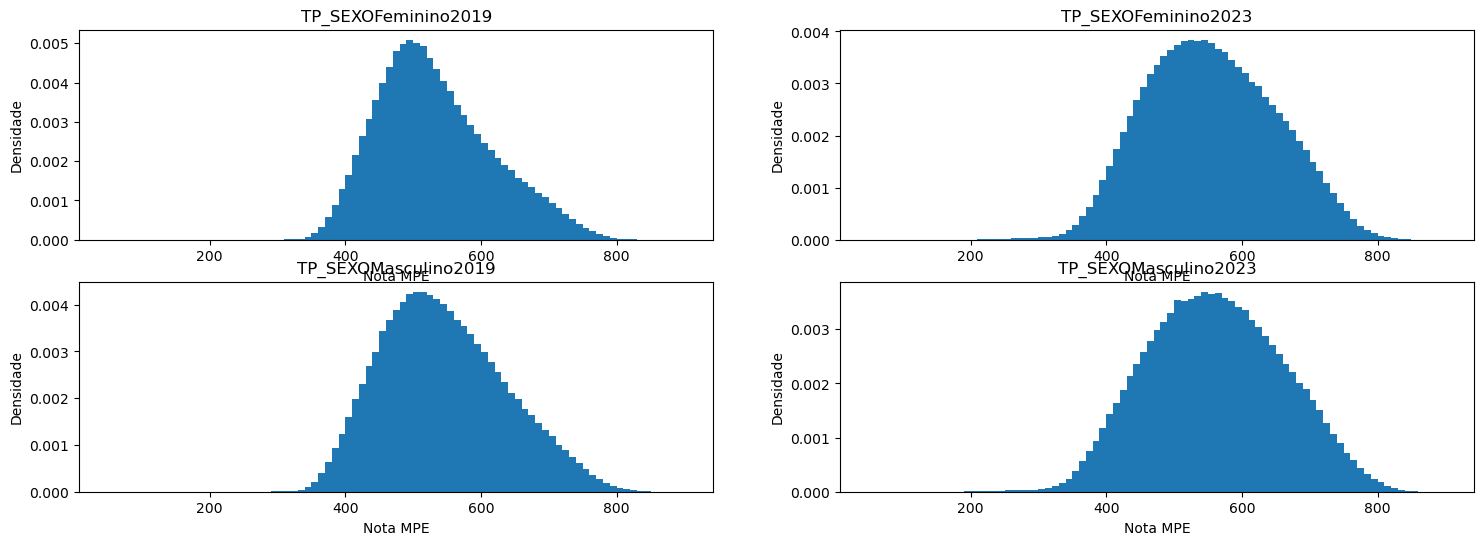

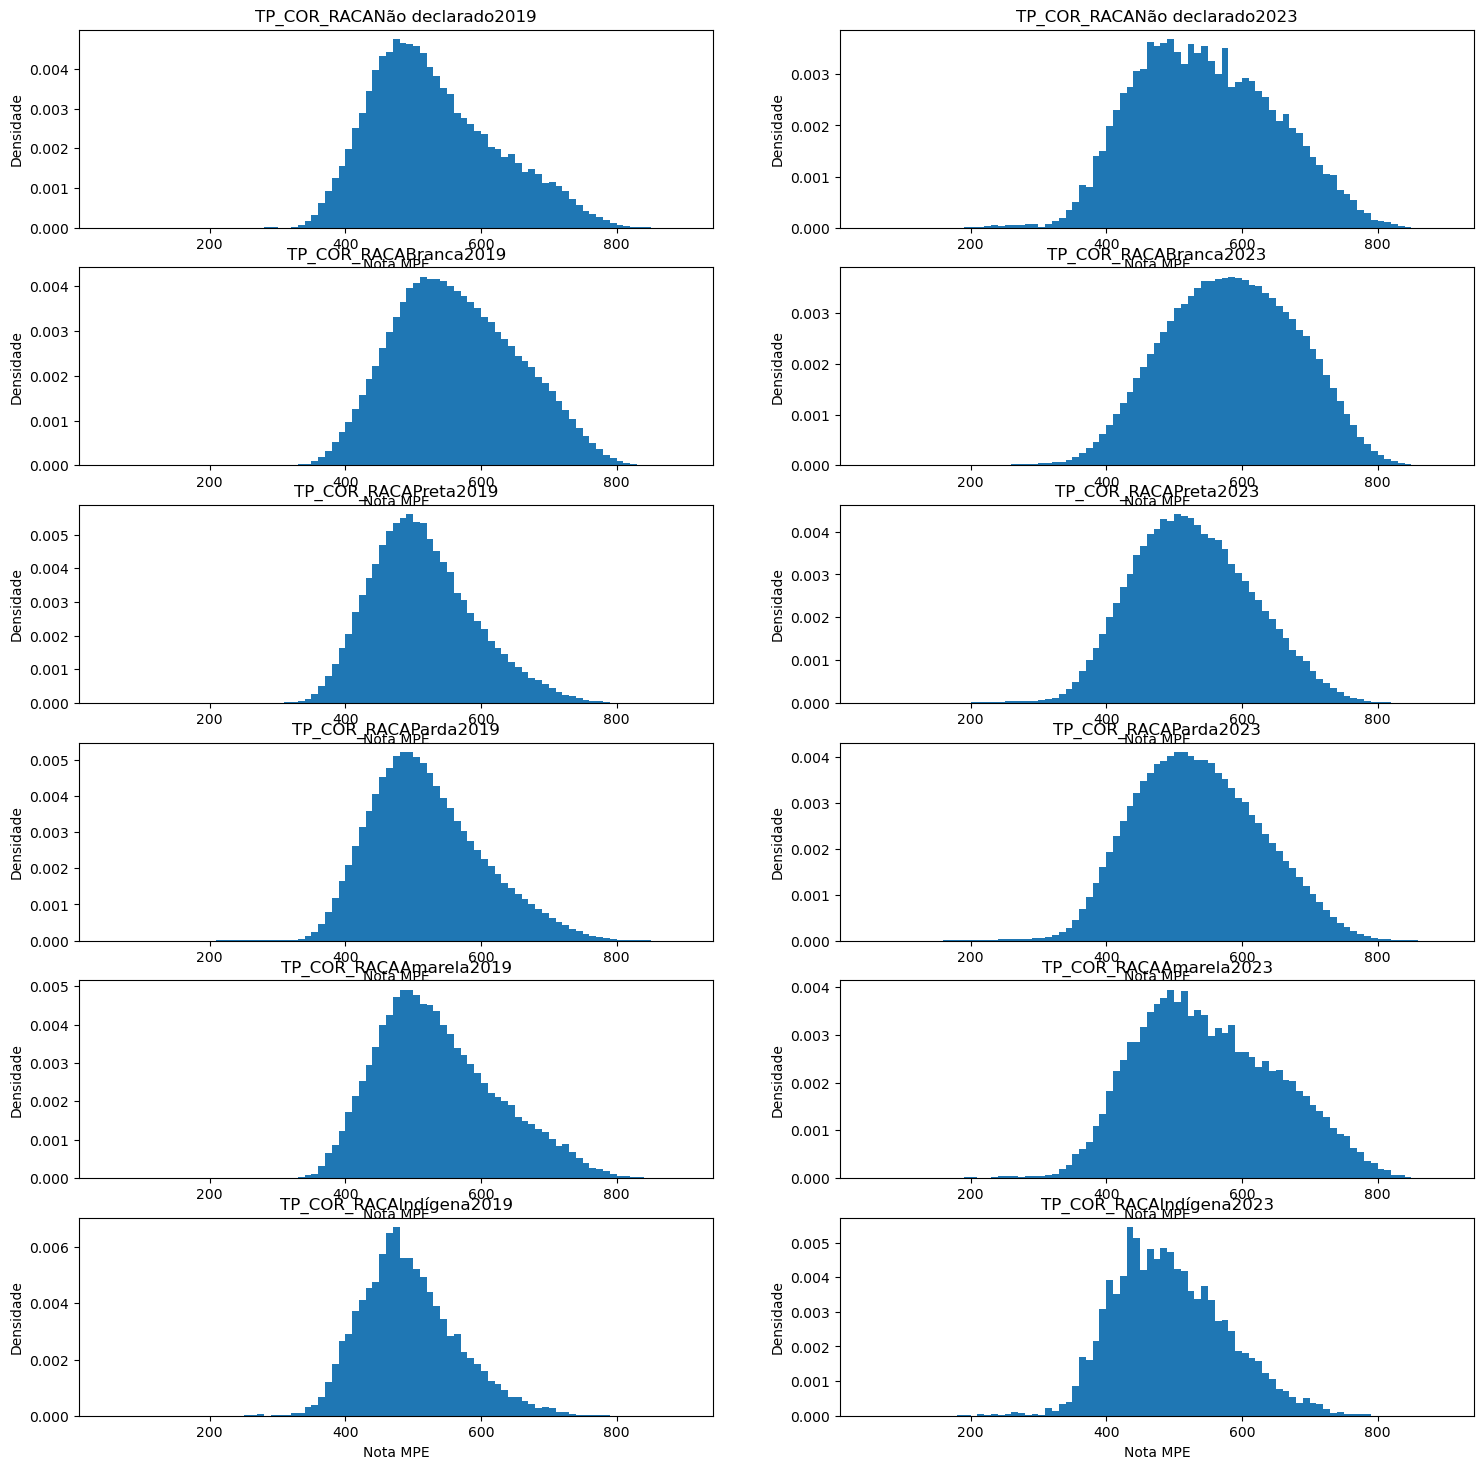

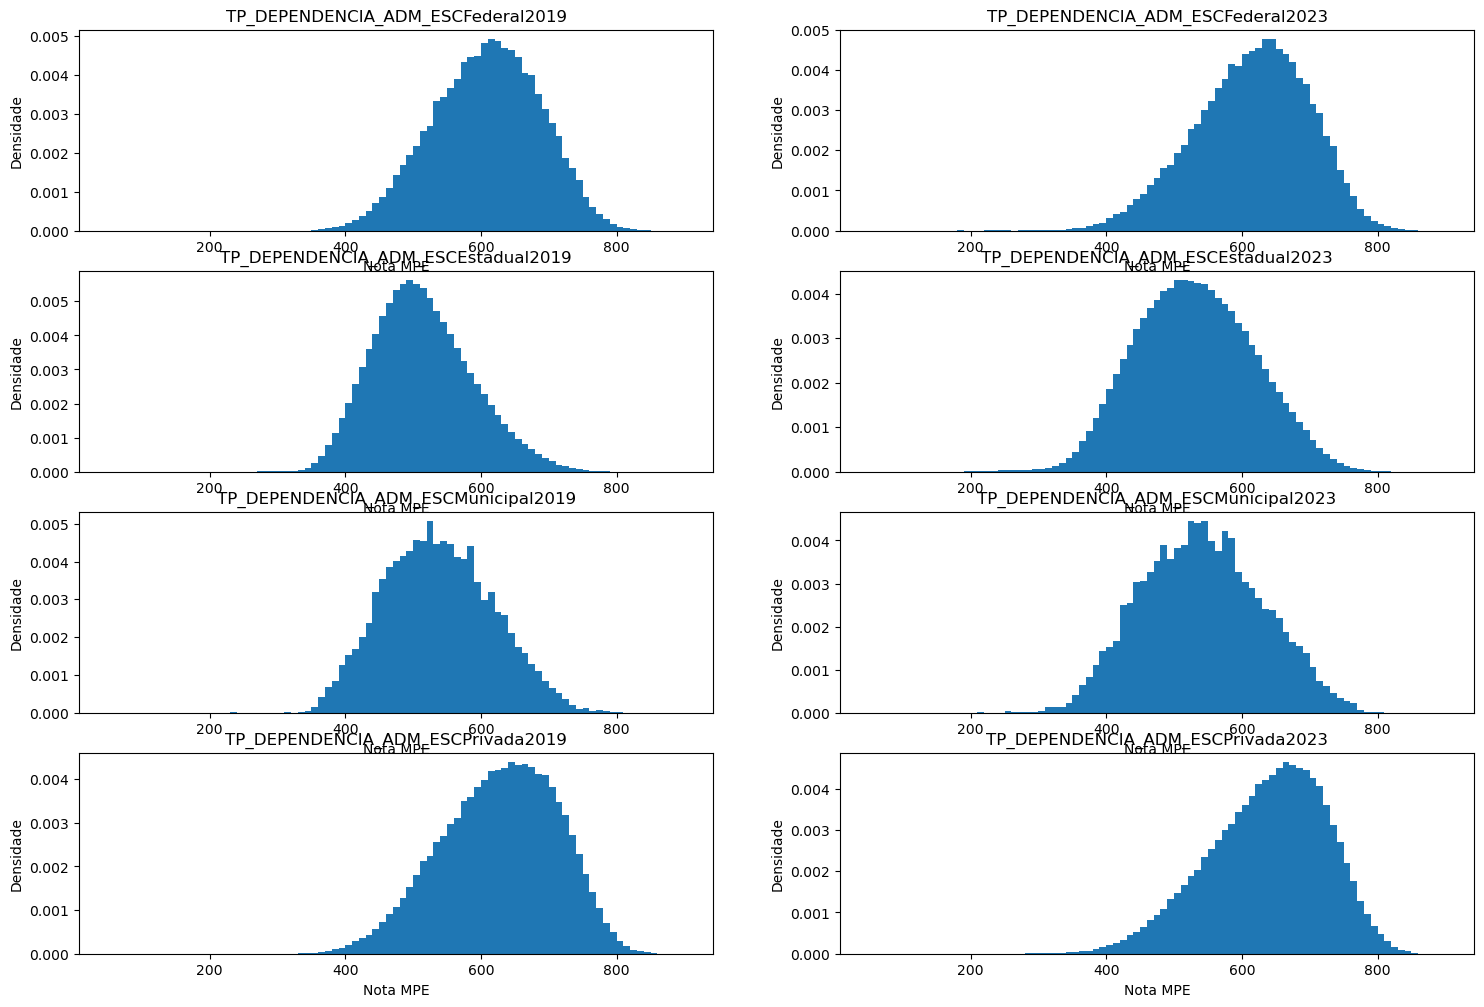

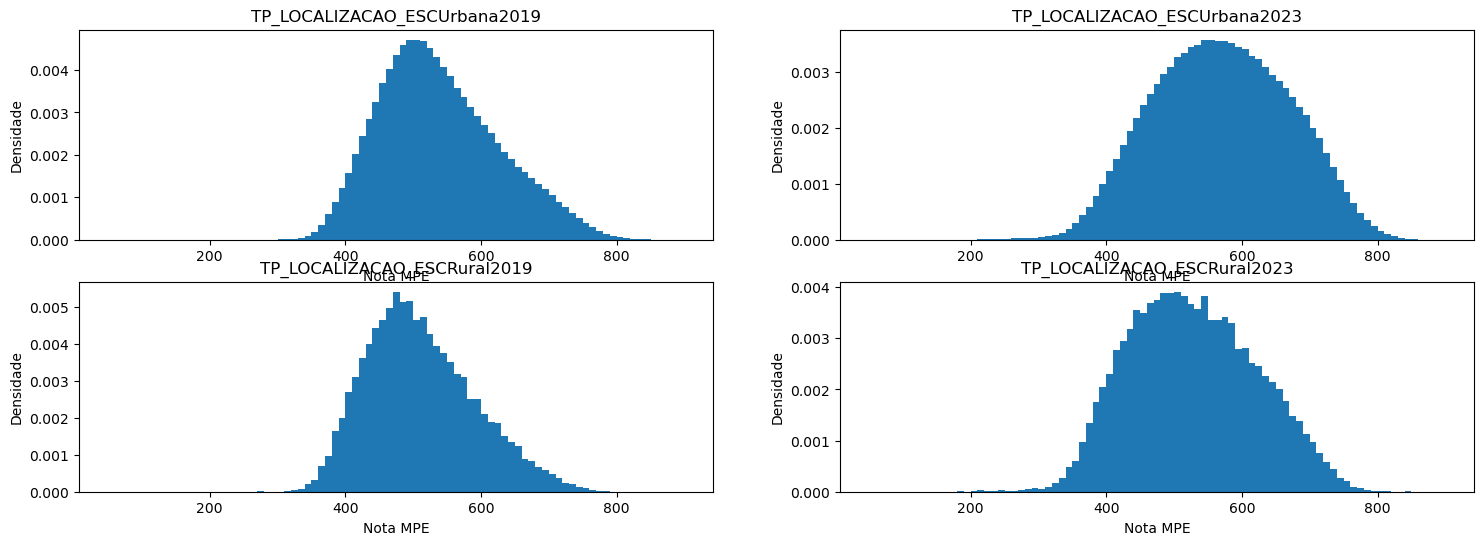

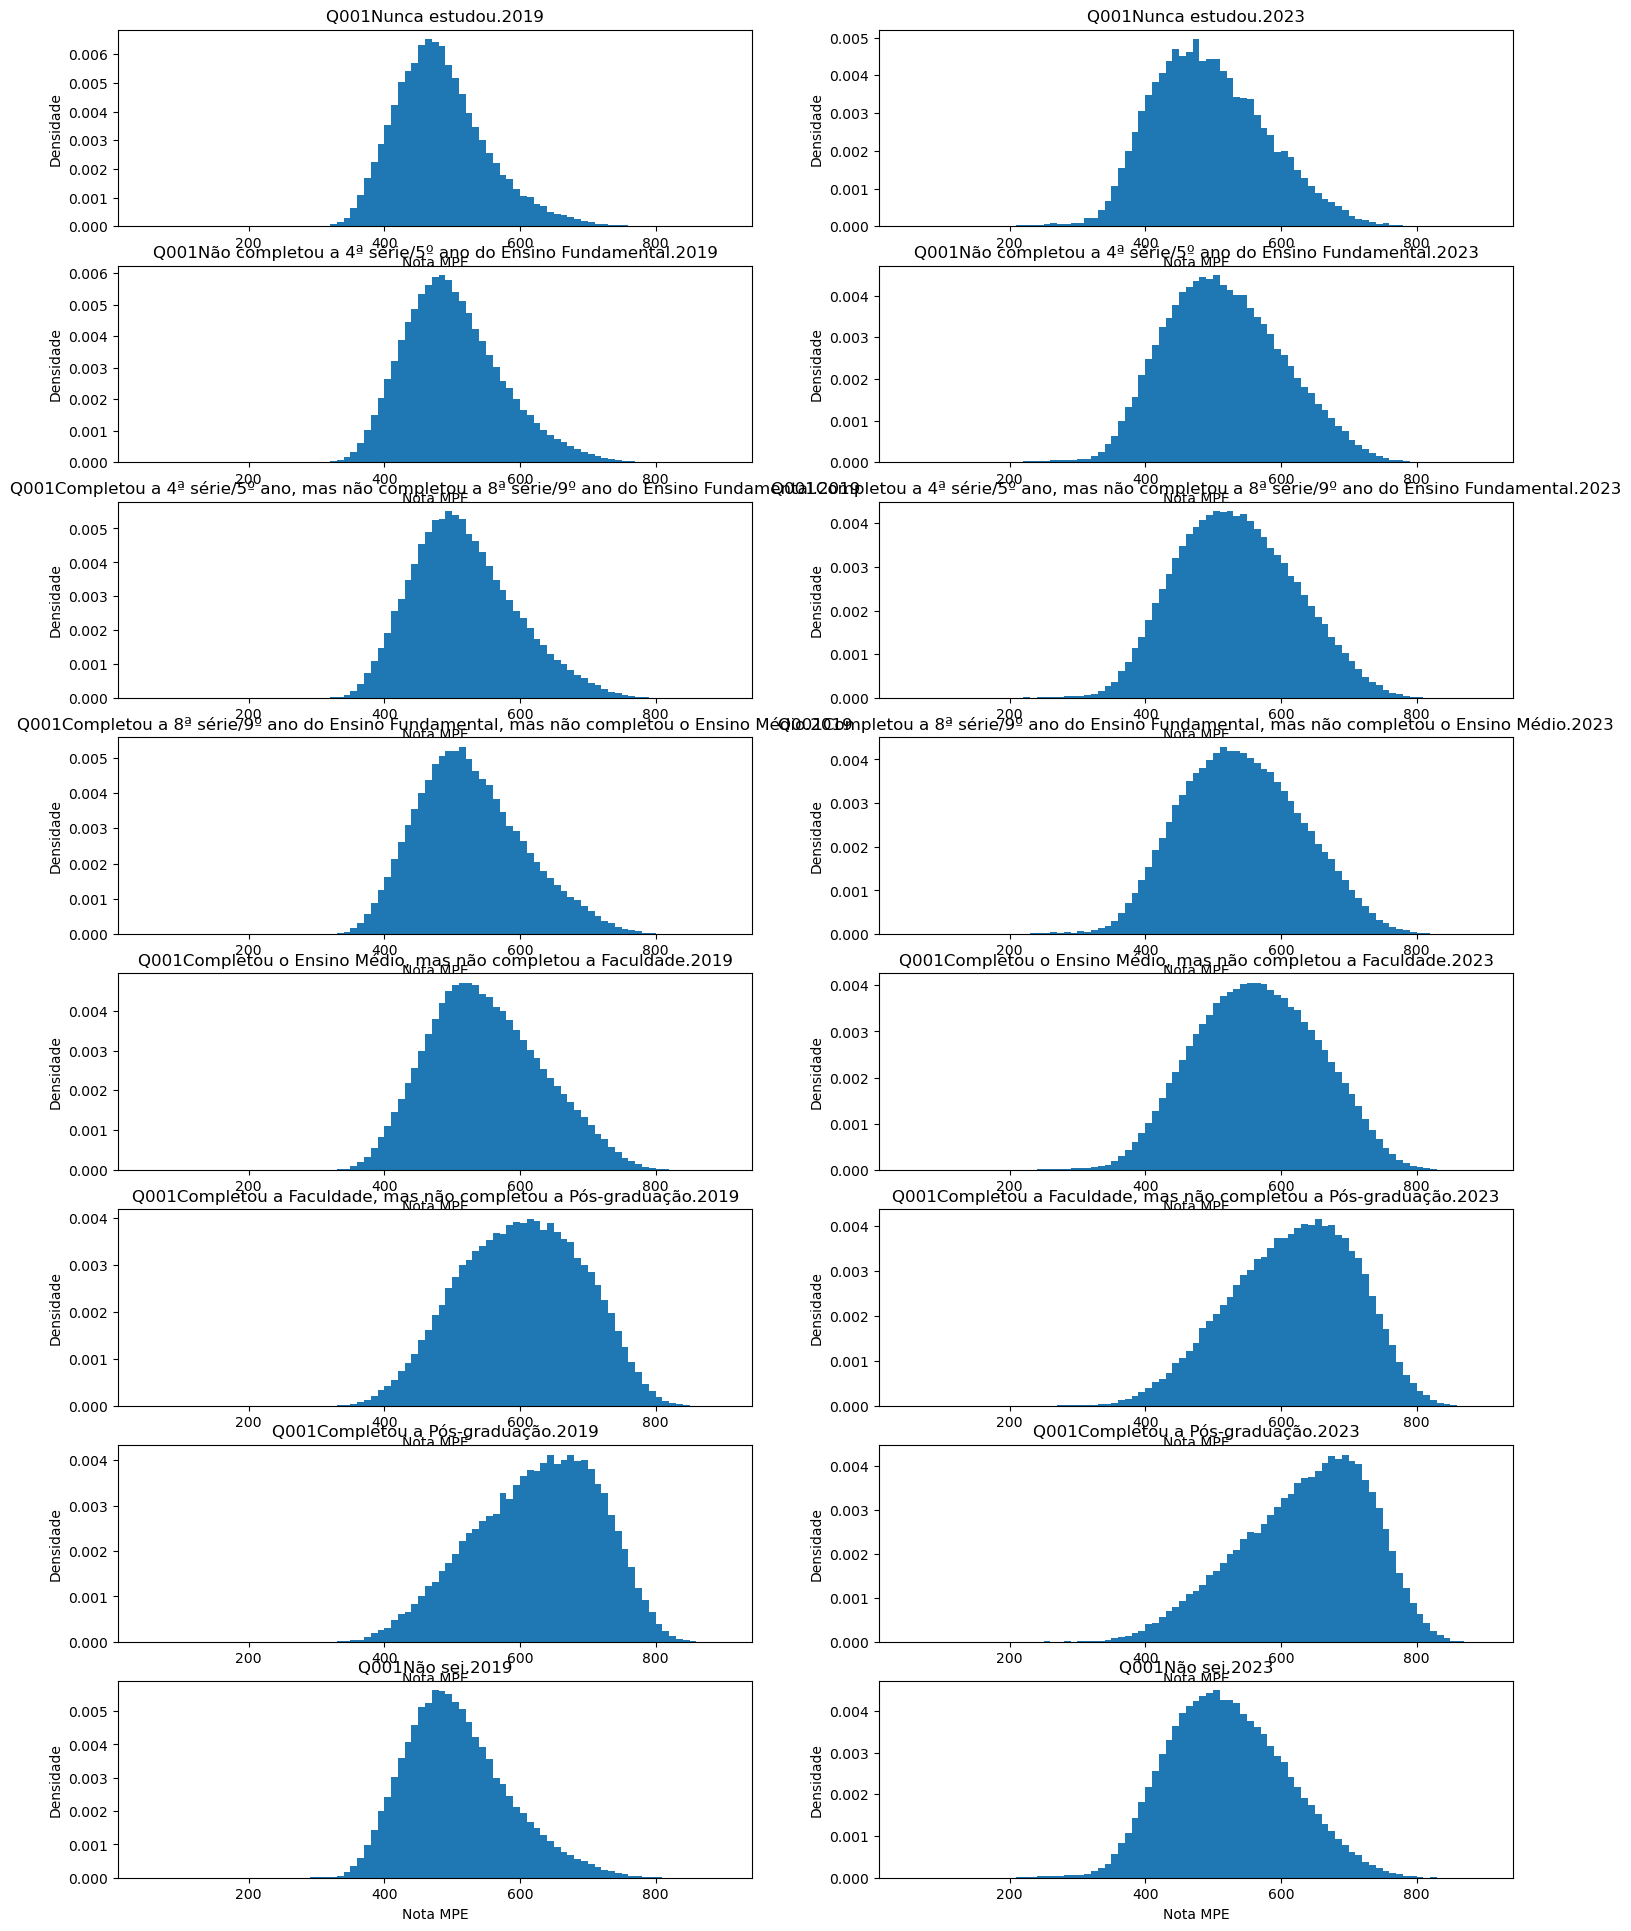

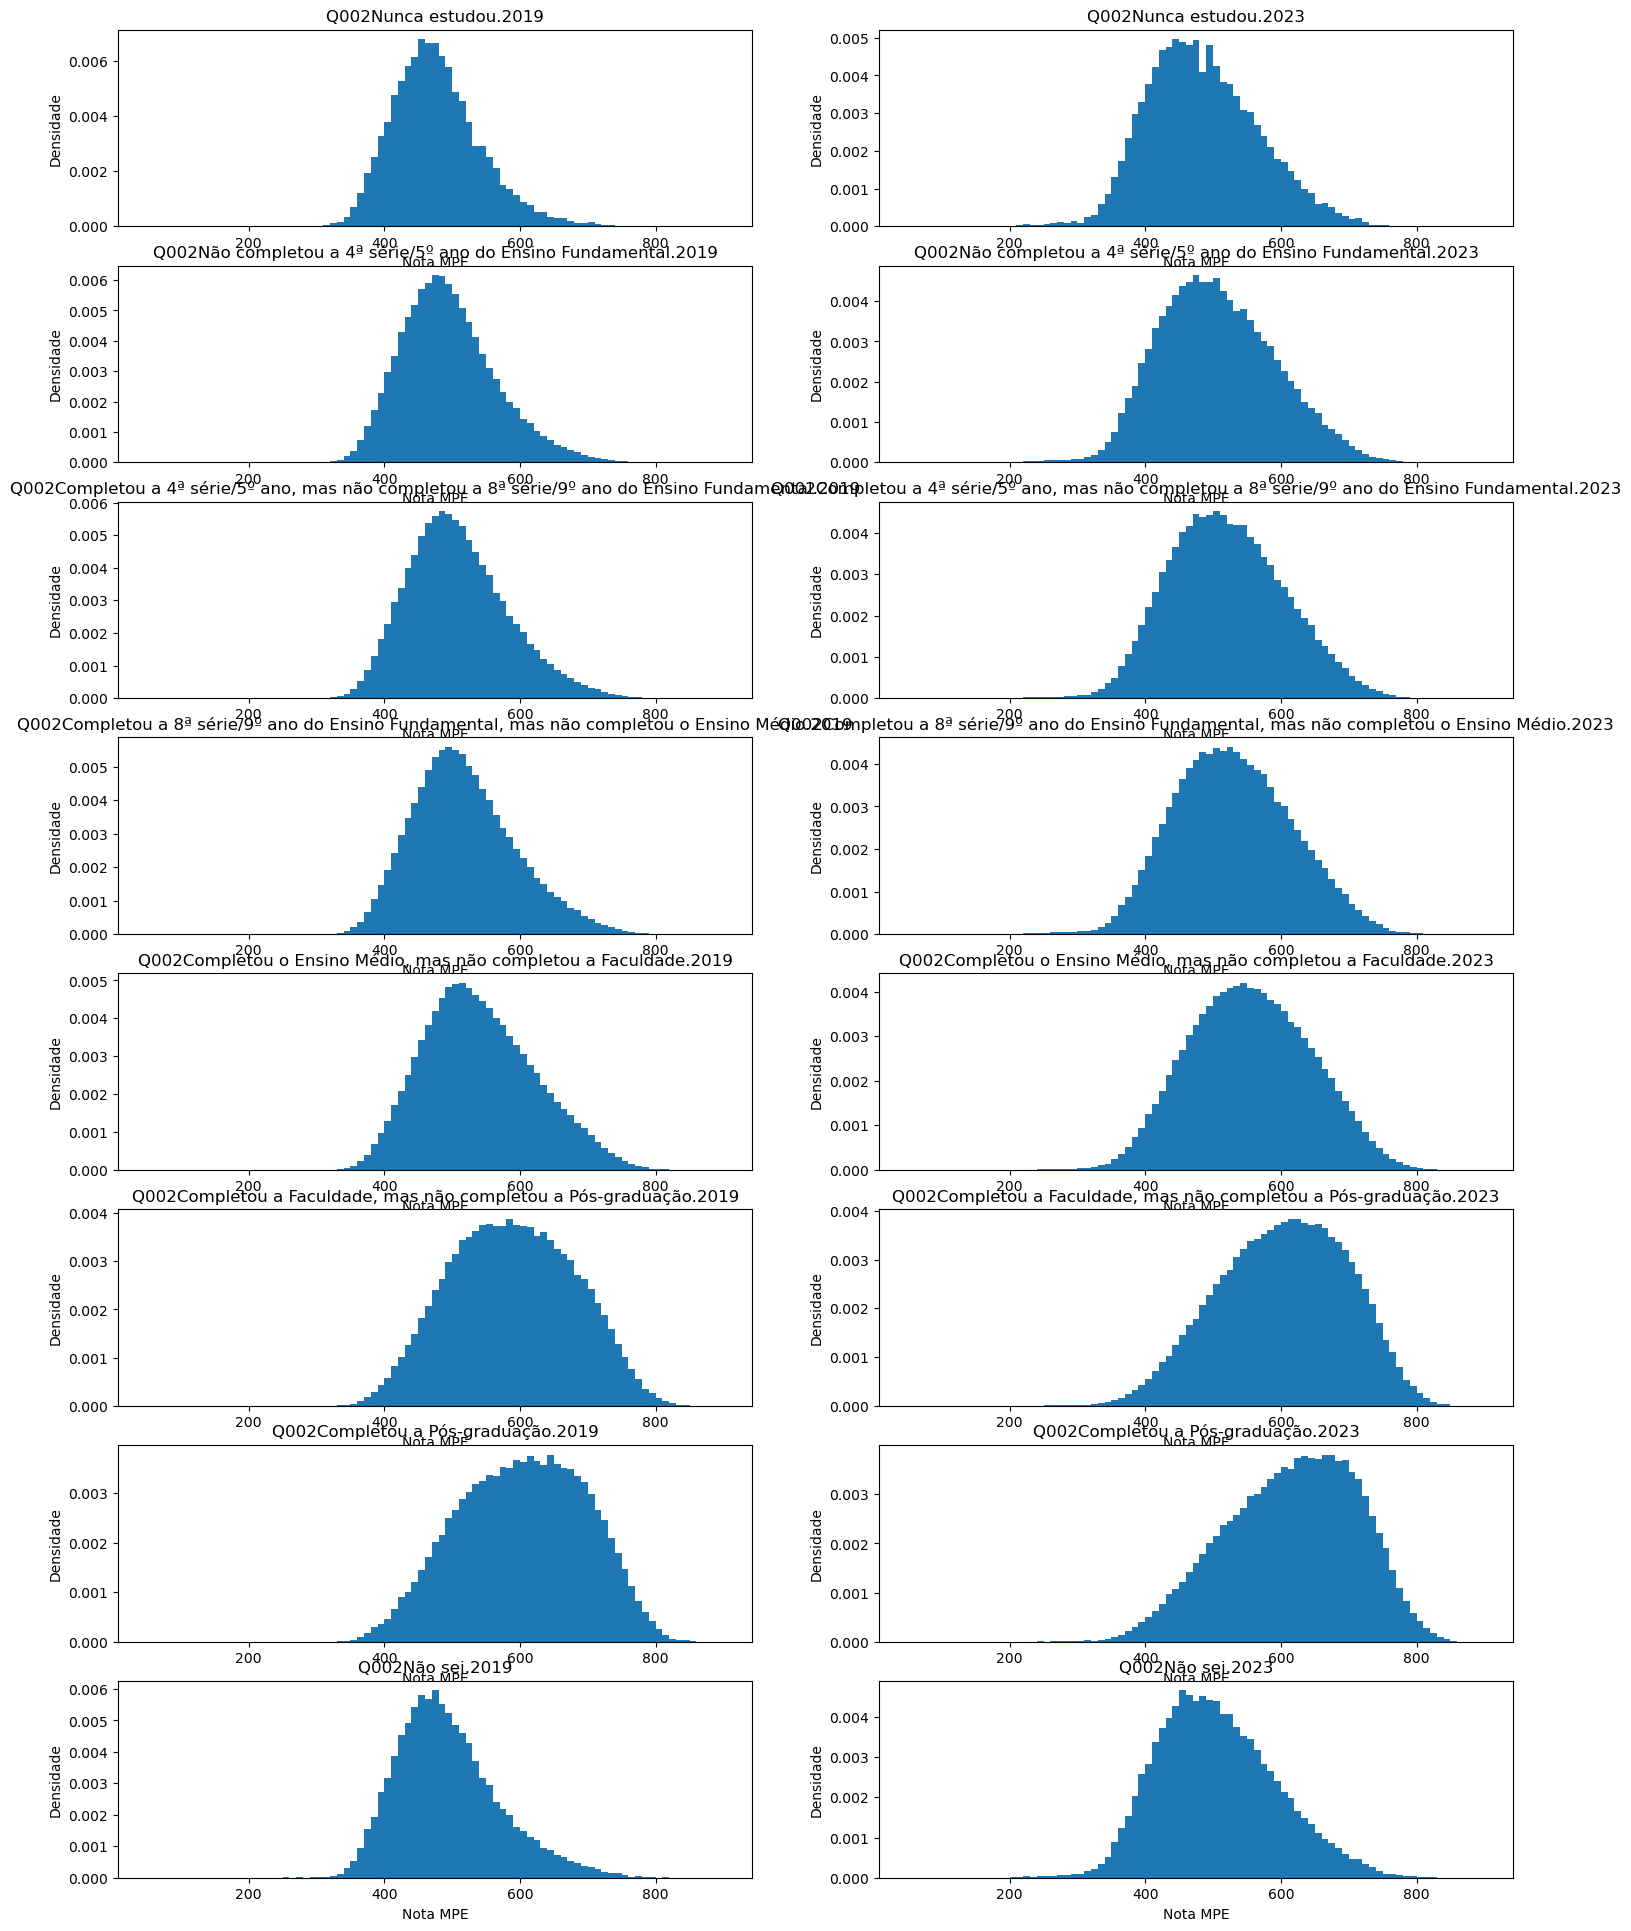

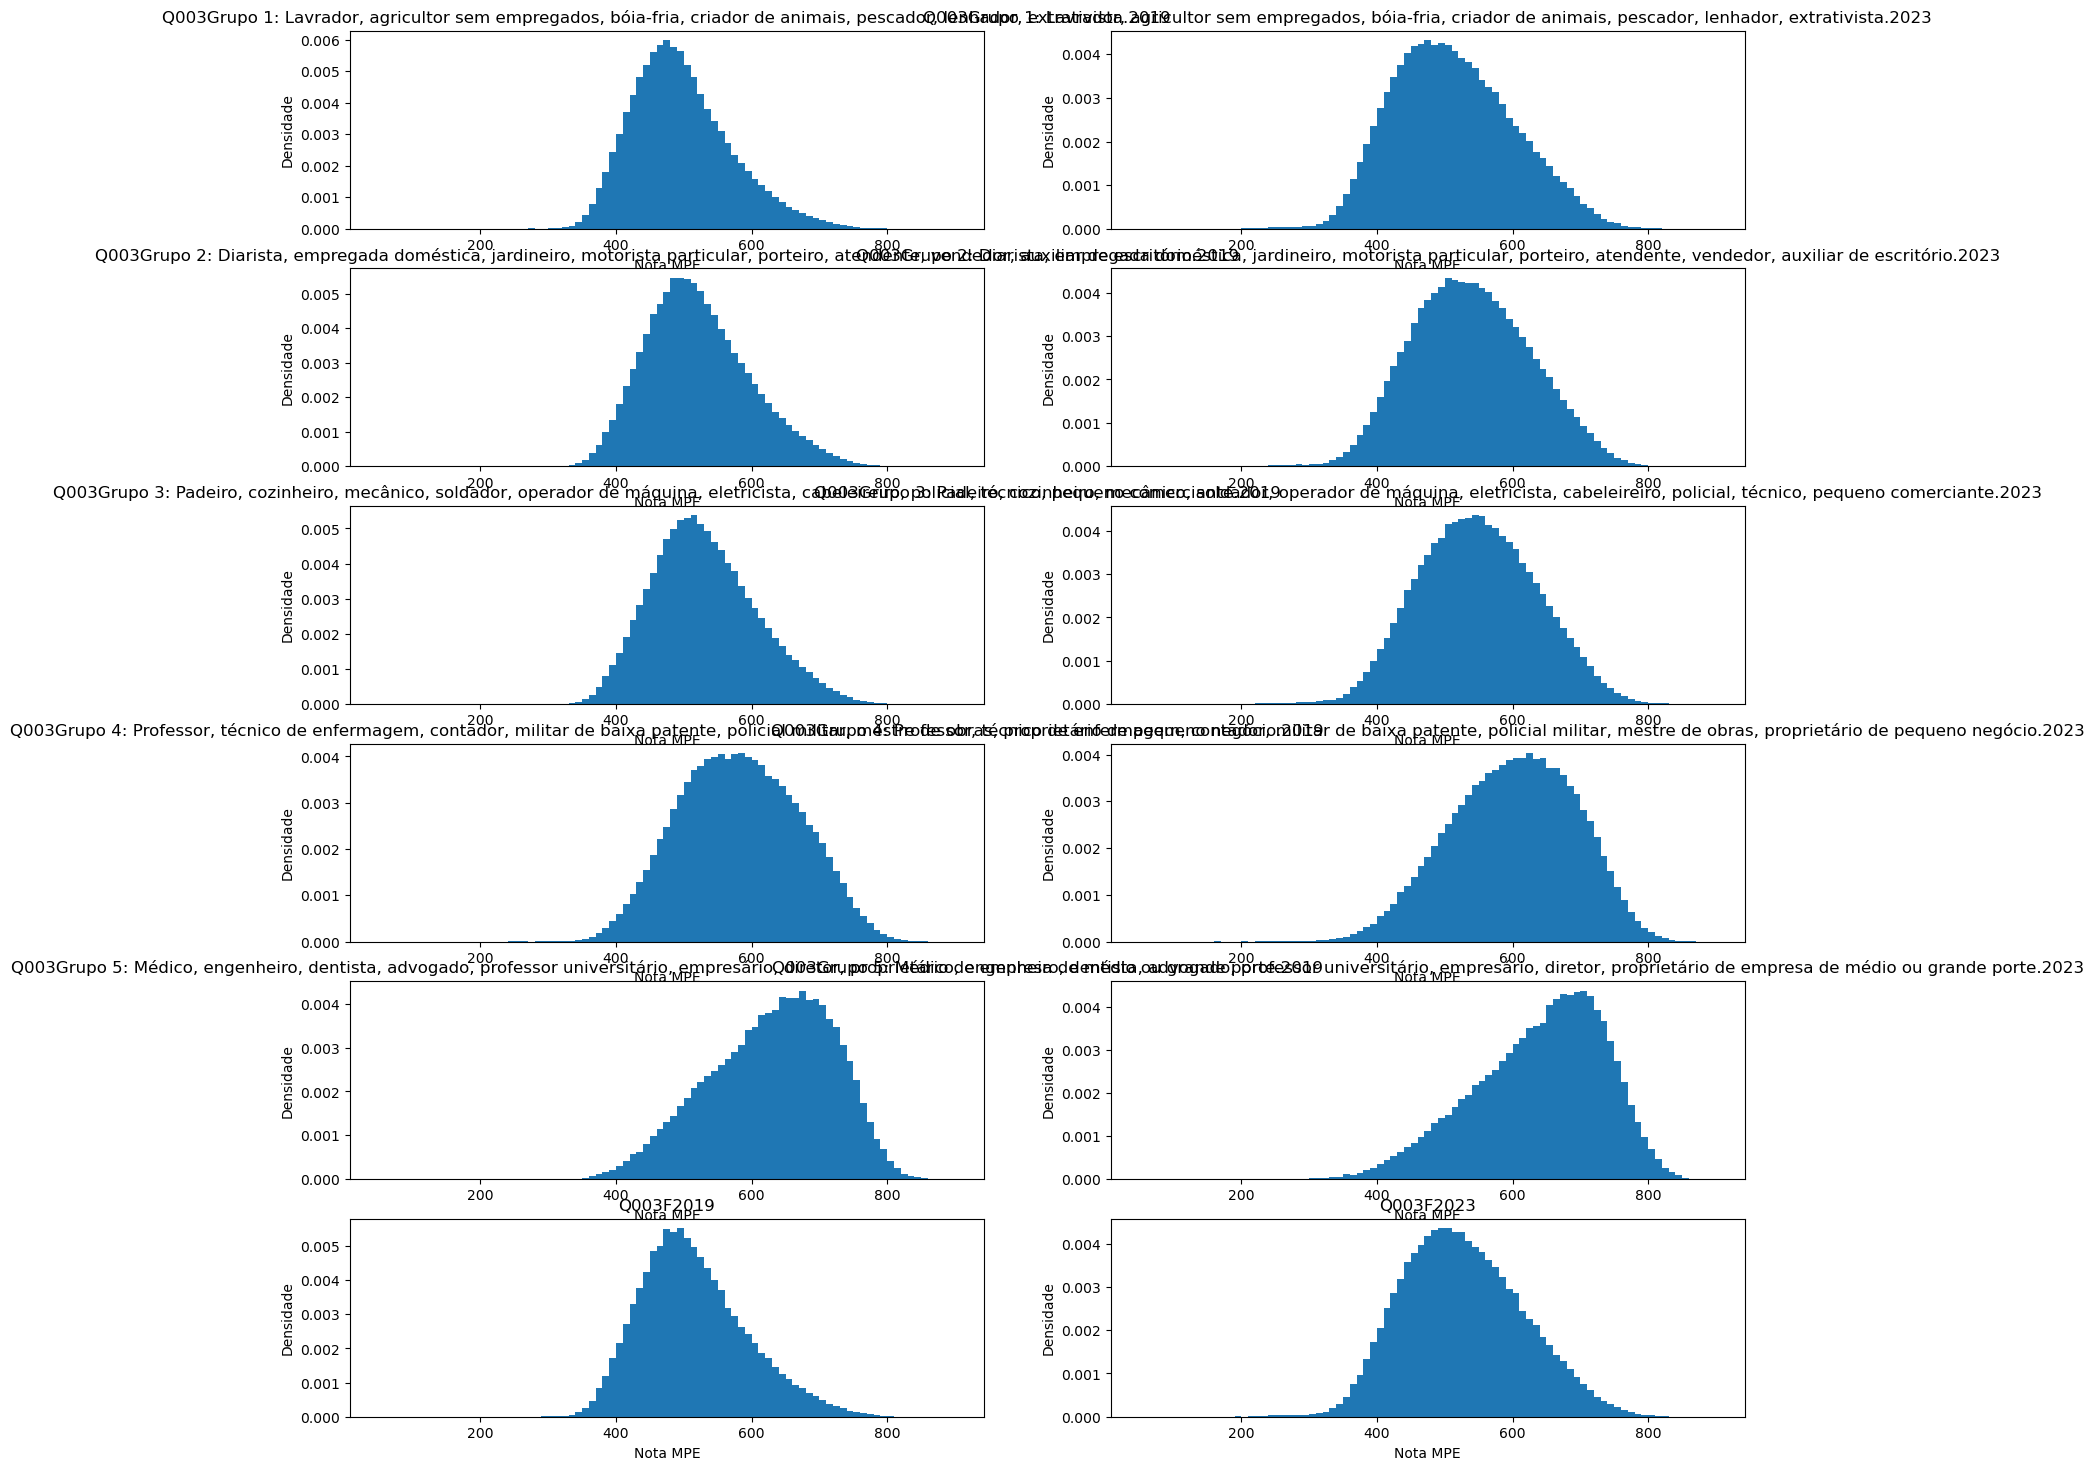

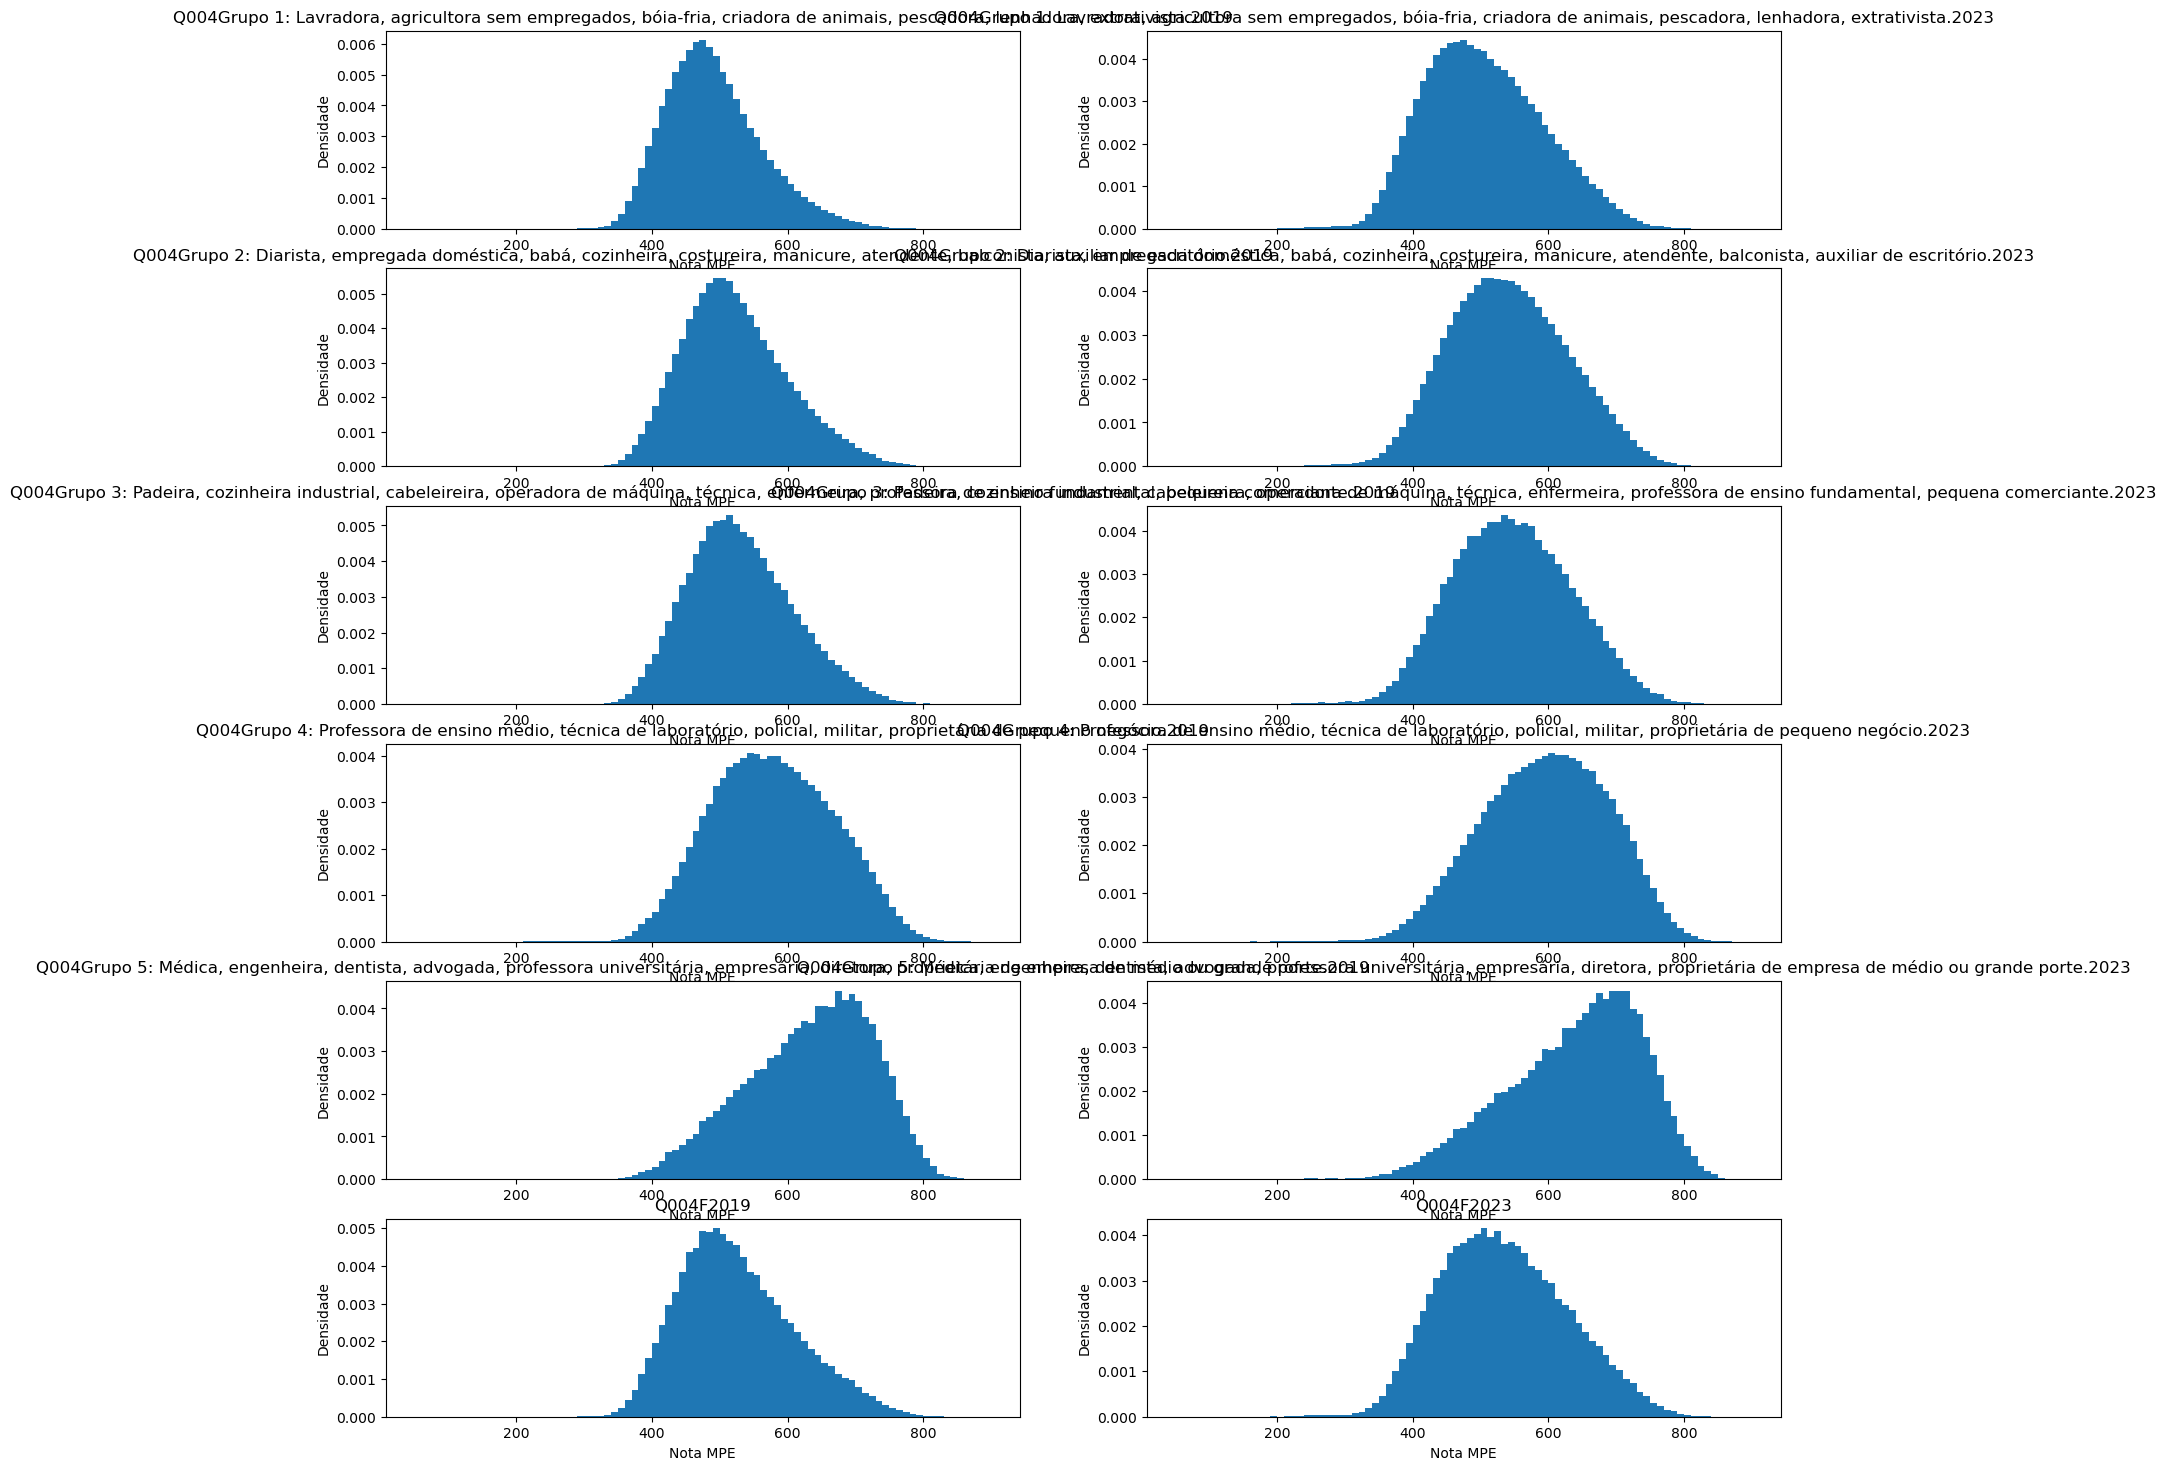

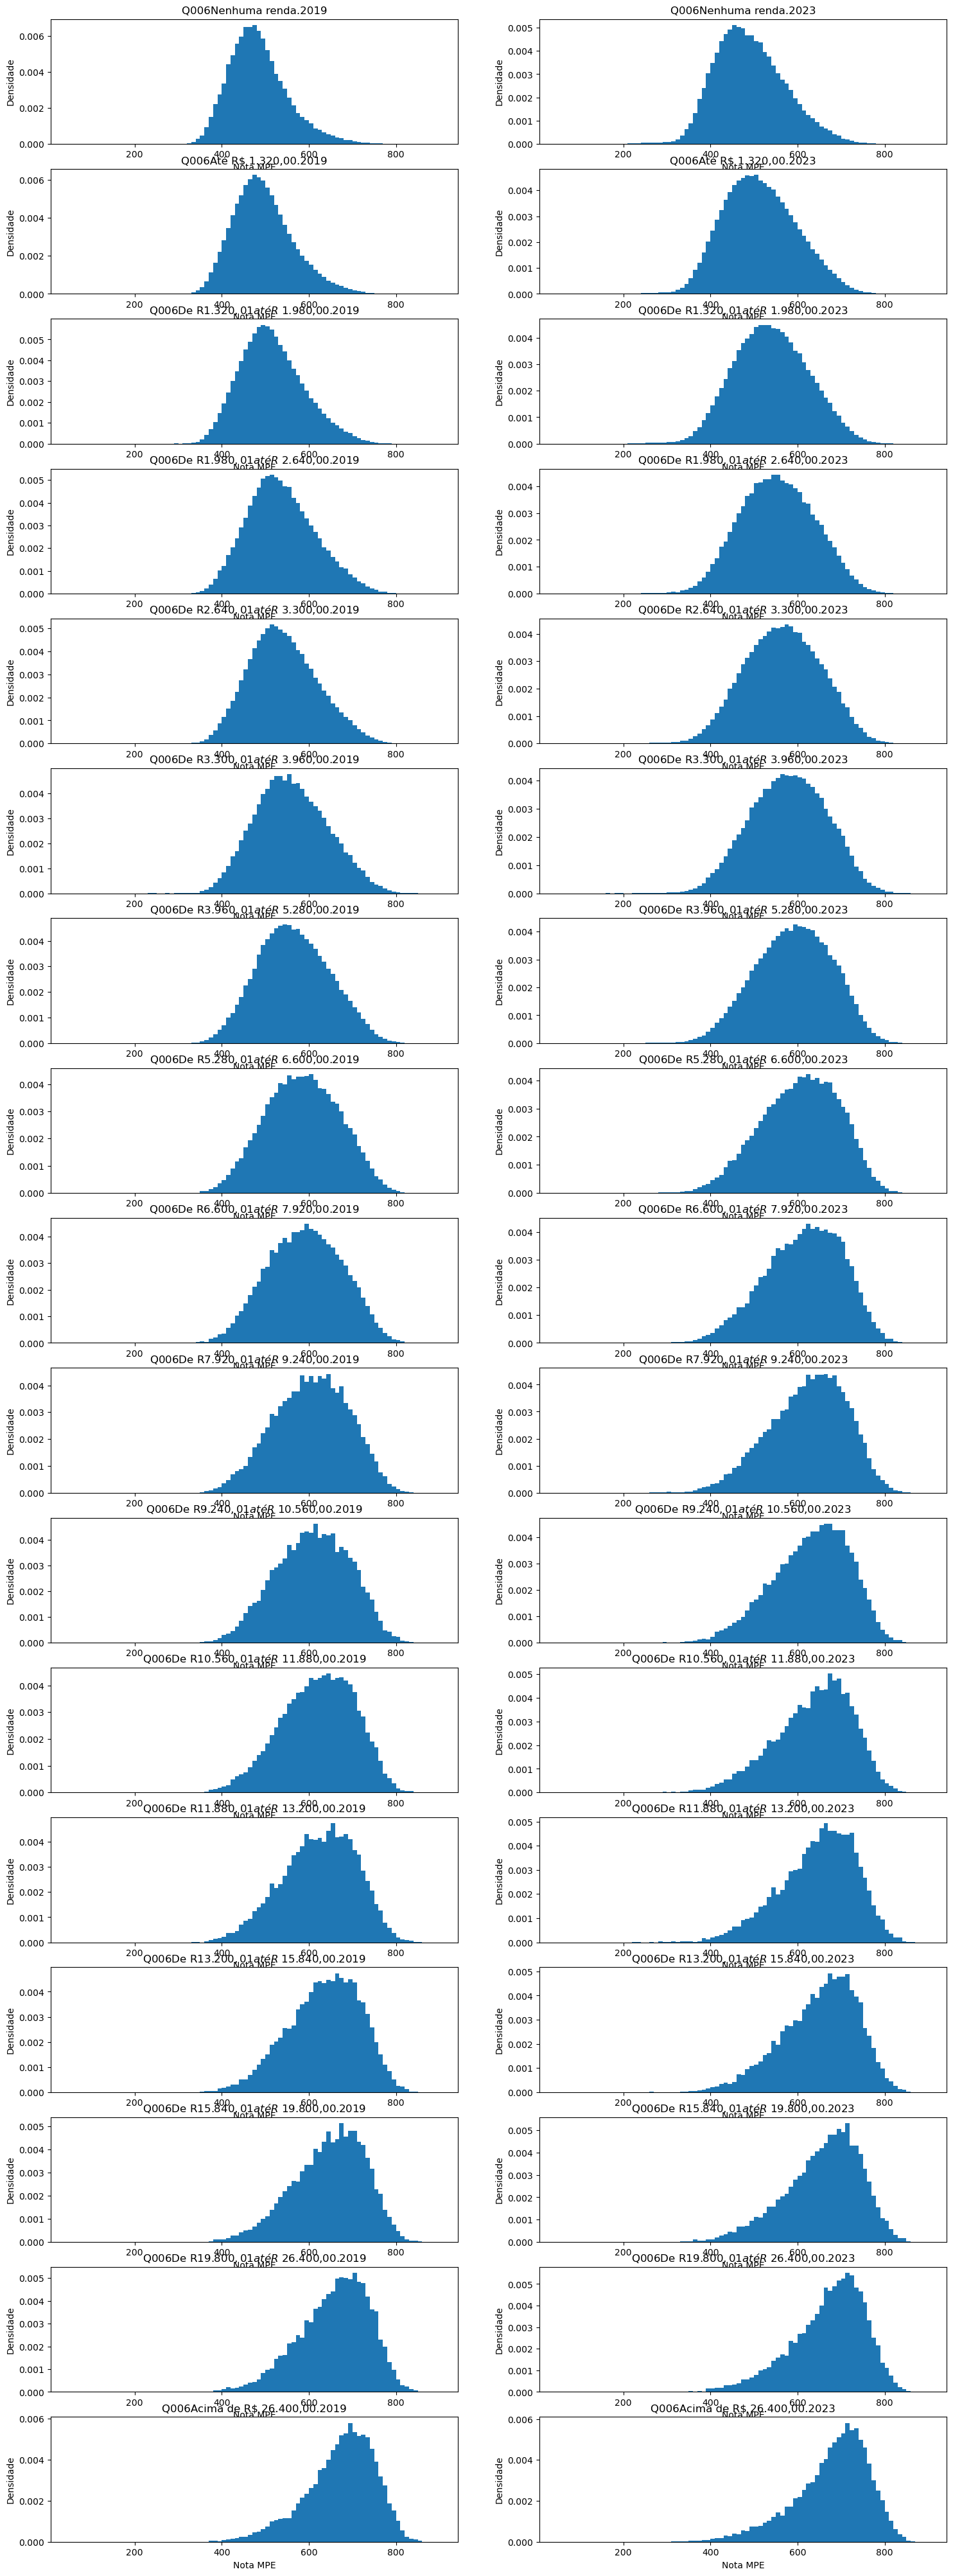

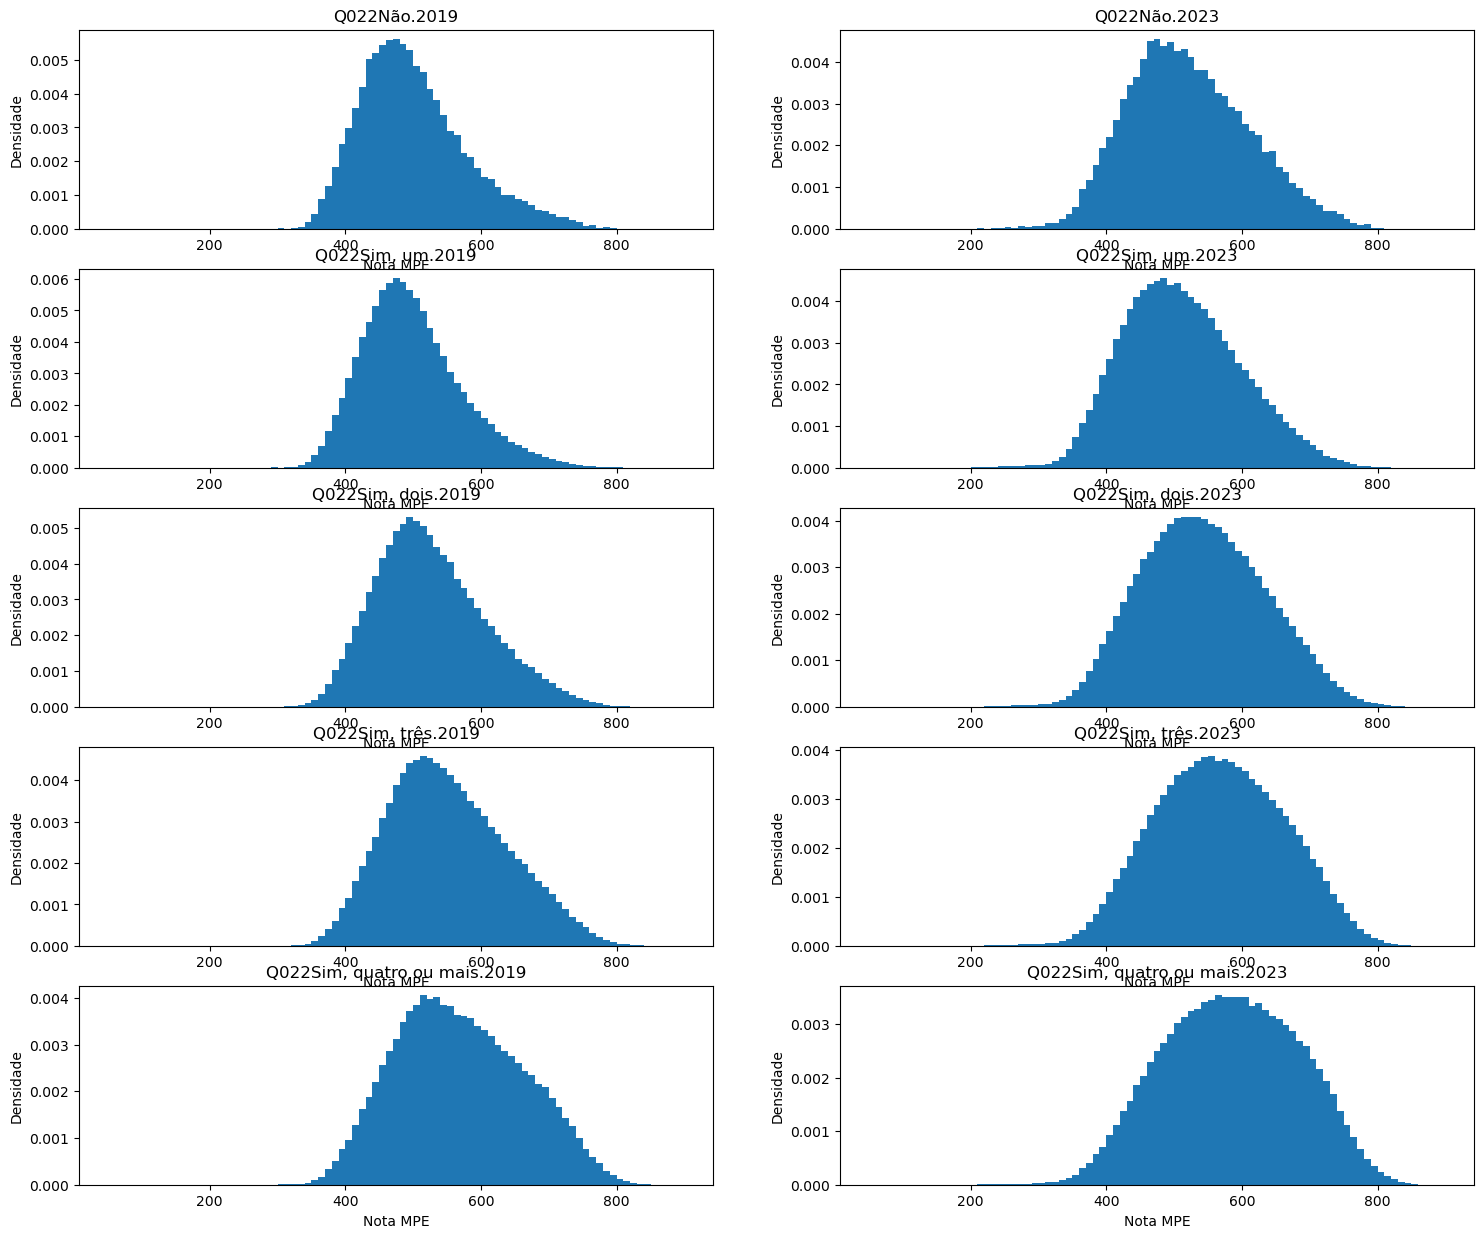

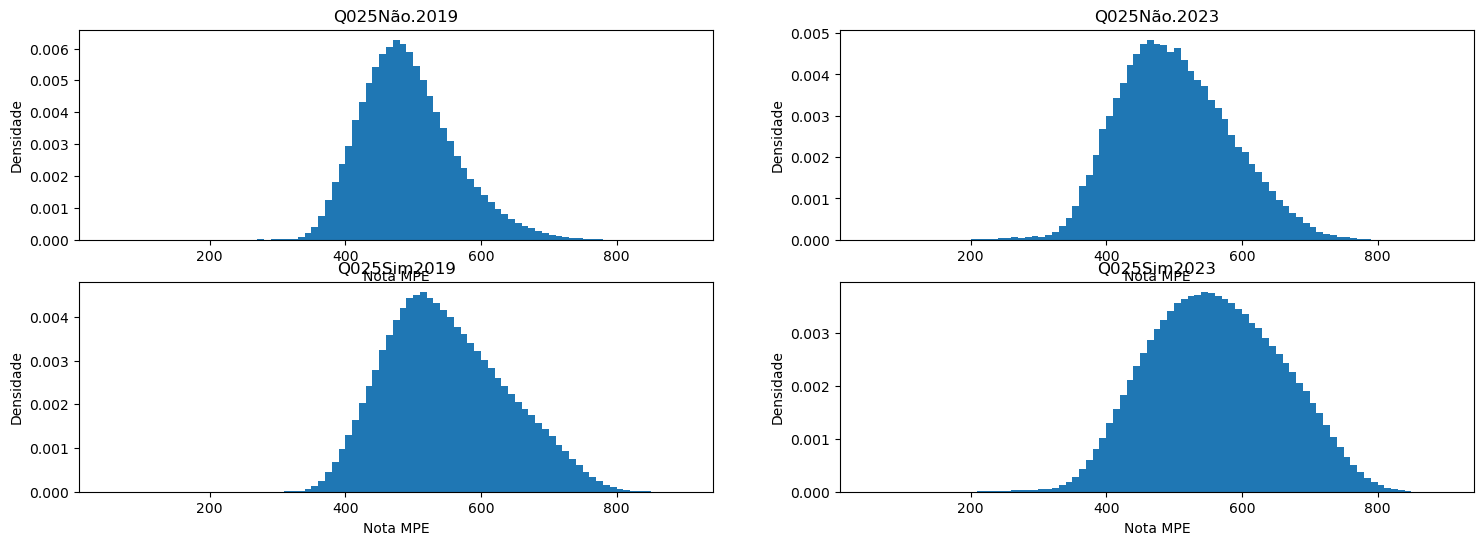

In [ ]:
Faixa = np.arange(50, 910, 10)

for grp in lista_grupos:
    i = 1
    linhas = len(df19[grp].cat.categories)
    mult = 3*linhas
    plt.figure(figsize= (18,mult))
    for c in df19[grp].cat.categories:
        filtro19 = df19[grp] == c
        plt.subplot(linhas, 2, i)
        plt.hist(df19[filtro19].MPE, bins = Faixa, density= True)
        plt.title(grp+' '+c+' '+'2019')
        plt.ylabel('Densidade')
        plt.xlabel('Nota MPE')
        i += 1
        filtro23 = df23[grp] == c
        plt.subplot(linhas, 2, i)
        plt.hist(df23[filtro23].MPE, bins=Faixa, density=True)
        plt.title(grp+' '+c+' '+'2023')
        plt.ylabel('Densidade')
        plt.xlabel('Nota MPE')
        i+=1

plt.show()